# IoT - Analytics
## Deep Analytics, Visualitzation and Modelling
### Task 3: Evaluate Techniques for Wifi Locationing

### Index:

* [001 - Library import](#library_import)

* [002 - Data load](#data_load)

* [003 - Data model](#data_model)

    * [KNN_ALL](#KNN_ALL)
    
    * [KNN_SUB - BLDG01](#KNN_SUB_BLDG01)
    
    * [KNN_SUB - BLDG00_FL01](#KNN_SUB_BLDG00_FL01)
    
    * [KNN_SUB - BLDG02_FL03](#KNN_SUB_BLDG02_FL03)
    
    * [KNN_SUB - FL00](#KNN_SUB_FL00)
    
* [004 - Data predicting](#data_predicting)

### 001 - Library import <a id='library_import'></a>

In [1]:
import sys

import numpy as np
print ('Numpy: ', np.__version__)
import pandas as pd
print ('Pandas: ', pd.__version__)

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print ('Matplotlib: ', mpl.__version__)

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import neighbors
print ('scikit-learn: ', sk.__version__)

import math as math
from math import sqrt

import timeit

Numpy:  1.16.3
Pandas:  0.23.4
Matplotlib:  3.0.3
scikit-learn:  0.21.0


### 002 - Data load  <a id='data_load'></a>

In [2]:
df_train_clean = pd.read_csv("trainingData_clean.csv")
df_valid_clean = pd.read_csv("validationData_clean.csv")
print('Loading data...')
print ()
print ('dimensions (rows, column)')
print ('train:', df_train_clean.shape)
print ('valid:', df_valid_clean.shape)
print ()
print (df_train_clean.info())
print ()
print('...into the dataframe - ready!')

Loading data...

dimensions (rows, column)
train: (19300, 396)
valid: (1109, 532)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Columns: 396 entries, WAP001 to ABSOLUTE_LATITUDE
dtypes: float64(4), int64(391), object(1)
memory usage: 58.3+ MB
None

...into the dataframe - ready!


In [3]:
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,2,1,106,2,2,23,2013-06-20 07:35:33,17,150.0741,175.033184
1,0,0,0,0,0,0,0,0,0,0,...,2,1,106,2,2,23,2013-06-20 07:34:51,16,154.7172,188.480184
2,0,0,0,0,0,8,0,0,0,0,...,2,1,103,2,2,23,2013-06-20 07:41:35,15,172.1860,203.787184
3,0,0,0,0,0,0,0,0,0,0,...,2,1,102,2,2,23,2013-06-20 07:36:47,16,166.7680,188.347984
4,0,0,0,0,0,0,0,0,0,0,...,0,0,122,2,11,13,2013-05-30 10:28:30,0,59.1948,236.472084


In [4]:
df_valid_clean.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,2013-10-04 07:45:03,1,180.021956,141.647431
1,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,13,2013-10-07 14:10:54,12,312.071534,91.724822
2,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,13,2013-10-07 14:11:35,10,321.636675,98.518237
3,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,13,2013-10-07 14:12:18,10,330.113872,94.813768
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,2,2013-10-04 09:09:34,14,54.439452,174.383692


### 003 - Data model <a id='data_model'></a>

In [5]:
# remove unnecessary colums
print ('remove unnecessary colums')
print ('dimensions (rows, column)')
# Training dataset
df_train = df_train_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'WAP_COUNT'], axis=1)
print ('train:', df_train.shape)
# Test dataset
df_valid = df_valid_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'WAP_COUNT'], axis=1)
print ('test:', df_valid.shape)

remove unnecessary colums
dimensions (rows, column)
train: (19300, 388)
test: (1109, 524)


In [6]:
# to make sure we have the same column in teh trainingData and validationData
df_valid_column = pd.DataFrame()

for i in df_train.columns:
    if i in (df_valid.columns):
        df_valid_column[i] = df_valid.loc[:, i]

In [7]:
df_valid = df_valid_column

In [8]:
print (df_valid.shape)
print (df_train.shape)

(1109, 388)
(19300, 388)


### KNN_ALL <a id='KNN_ALL'></a>

#### KNN_ALL - SPLITTING

In [9]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_ALL_FL = df_train.iloc[:, :-4].values
y_KNN_ALL_FL = df_train.iloc[:, 384].values

X_KNN_ALL_BLDG = df_train.iloc[:, :-4].values
y_KNN_ALL_BLDG = df_train.iloc[:, 385].values

X_KNN_ALL_LON = df_train.iloc[:, :-4].values
y_KNN_ALL_LON = df_train.iloc[:, 386].values

X_KNN_ALL_LAT = df_train.iloc[:, :-4].values
y_KNN_ALL_LAT = df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_ALL_FL_train, X_KNN_ALL_FL_test, y_KNN_ALL_FL_train, y_KNN_ALL_FL_test = train_test_split(X_KNN_ALL_FL, y_KNN_ALL_FL, test_size=0.3, random_state=0)
X_KNN_ALL_BLDG_train, X_KNN_ALL_BLDG_test, y_KNN_ALL_BLDG_train, y_KNN_ALL_BLDG_test = train_test_split(X_KNN_ALL_BLDG, y_KNN_ALL_BLDG, test_size=0.3, random_state=0)
X_KNN_ALL_LON_train, X_KNN_ALL_LON_test, y_KNN_ALL_LON_train, y_KNN_ALL_LON_test = train_test_split(X_KNN_ALL_LON, y_KNN_ALL_LON, test_size=0.3, random_state=0)
X_KNN_ALL_LAT_train, X_KNN_ALL_LAT_test, y_KNN_ALL_LAT_train, y_KNN_ALL_LAT_test = train_test_split(X_KNN_ALL_LAT, y_KNN_ALL_LAT, test_size=0.3, random_state=0)

#### KNN_ALL - FLOOR

In [10]:
KNN_ALL_FL_start = timeit.default_timer() # start computing time

KNN_ALL_FL_r2_val = [] # to store r2 values for different k
KNN_ALL_FL_ac_val = [] # to store accuracy values for different k
KNN_ALL_FL_ka_val = [] # to store kappa values for different k

for KNN_ALL_FL in range(10):
    KNN_ALL_FL = KNN_ALL_FL + 1
    KNN_ALL_FL_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_ALL_FL)
    
    KNN_ALL_FL_model.fit(X_KNN_ALL_FL_train, y_KNN_ALL_FL_train)  # fit the model
    KNN_ALL_FL_pred = KNN_ALL_FL_model.predict(X_KNN_ALL_FL_test) # make prediction
    
    KNN_ALL_FL_r2 = r2_score(y_KNN_ALL_FL_test, KNN_ALL_FL_pred)
    KNN_ALL_FL_ac = accuracy_score(KNN_ALL_FL_pred, y_KNN_ALL_FL_test)
    KNN_ALL_FL_ka = cohen_kappa_score(y_KNN_ALL_FL_test, KNN_ALL_FL_pred)
    
    KNN_ALL_FL_r2_val.append(KNN_ALL_FL_r2) # store r2 values
    KNN_ALL_FL_ac_val.append(KNN_ALL_FL_ac) # store accuracy values
    KNN_ALL_FL_ka_val.append(KNN_ALL_FL_ka) # store kappa values
 
    print('Value (KNN_ALL_FL) for k=', KNN_ALL_FL, 'is:')    
    print('Rsqaure:', KNN_ALL_FL_r2)
    print('Accuracy', KNN_ALL_FL_ac)
    print('Kappa', KNN_ALL_FL_ka)

print ()
KNN_ALL_FL_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_ALL_FL = neighbors.KNeighborsClassifier()
KNN_ALL_FL_model = GridSearchCV(KNN_ALL_FL, KNN_ALL_FL_params, cv=5)
KNN_ALL_FL_model.fit(X_KNN_ALL_FL_train, y_KNN_ALL_FL_train)
print ('BEST   :', KNN_ALL_FL_model.best_params_)

print ()
KNN_ALL_FL_stop = timeit.default_timer() # stop computing time
KNN_ALL_FL_t = (KNN_ALL_FL_stop - KNN_ALL_FL_start)/60 
print ('Time in min: ', round(KNN_ALL_FL_t, 3))

Value (KNN_ALL_FL) for k= 1 is:
Rsqaure: 0.9822918721528221
Accuracy 0.9960276338514681
Kappa 0.9948120985896832
Value (KNN_ALL_FL) for k= 2 is:
Rsqaure: 0.9822918721528221
Accuracy 0.9960276338514681
Kappa 0.9948122156058309
Value (KNN_ALL_FL) for k= 3 is:
Rsqaure: 0.982777026340416
Accuracy 0.9962003454231434
Kappa 0.9950379423284087
Value (KNN_ALL_FL) for k= 4 is:
Rsqaure: 0.9821705836059236
Accuracy 0.9953367875647668
Kappa 0.9939096278059131
Value (KNN_ALL_FL) for k= 5 is:
Rsqaure: 0.9819280065121266
Accuracy 0.9949913644214162
Kappa 0.9934580999503055
Value (KNN_ALL_FL) for k= 6 is:
Rsqaure: 0.9821705836059236
Accuracy 0.9953367875647668
Kappa 0.9939093347616702
Value (KNN_ALL_FL) for k= 7 is:
Rsqaure: 0.9814428523245327
Accuracy 0.994300518134715
Kappa 0.9925556180888312
Value (KNN_ALL_FL) for k= 8 is:
Rsqaure: 0.9849602201845886
Accuracy 0.994300518134715
Kappa 0.9925573565001696
Value (KNN_ALL_FL) for k= 9 is:
Rsqaure: 0.9849602201845886
Accuracy 0.994300518134715
Kappa 0.9925

In [11]:
KNN_ALL_FL_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_ALL_FL_model.fit(X_KNN_ALL_FL_train, y_KNN_ALL_FL_train)  # fit the model
KNN_ALL_FL_pred = KNN_ALL_FL_model.predict(X_KNN_ALL_FL_test) # make prediction

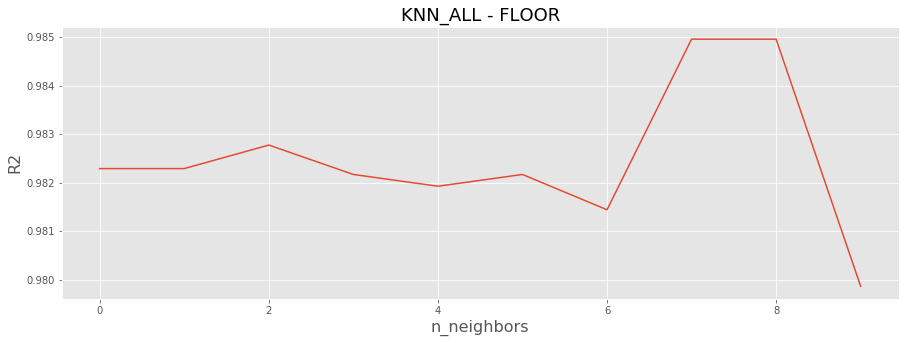

In [12]:
# plotting the r2 values against k values
KNN_ALL_FL_curveR2 = pd.DataFrame(KNN_ALL_FL_r2_val)
KNN_ALL_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_FL_R2.png', bbox_inches='tight')

plt.show()

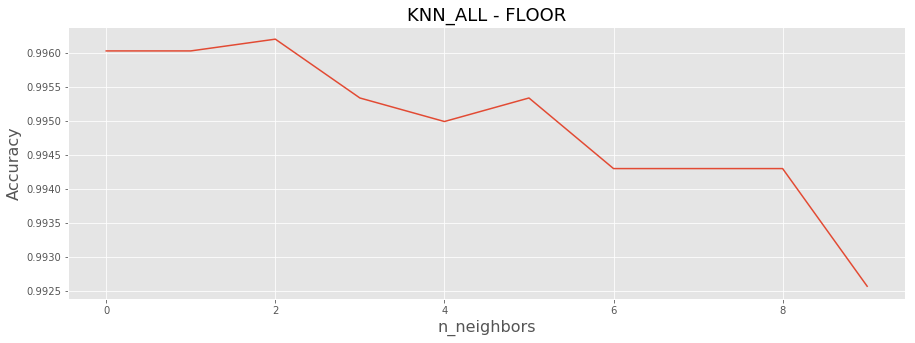

In [13]:
# plotting the accuracy values against k values
KNN_ALL_FL_curveAC = pd.DataFrame(KNN_ALL_FL_ac_val)
KNN_ALL_FL_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_FL_ACCURACY.png', bbox_inches='tight')

plt.show()

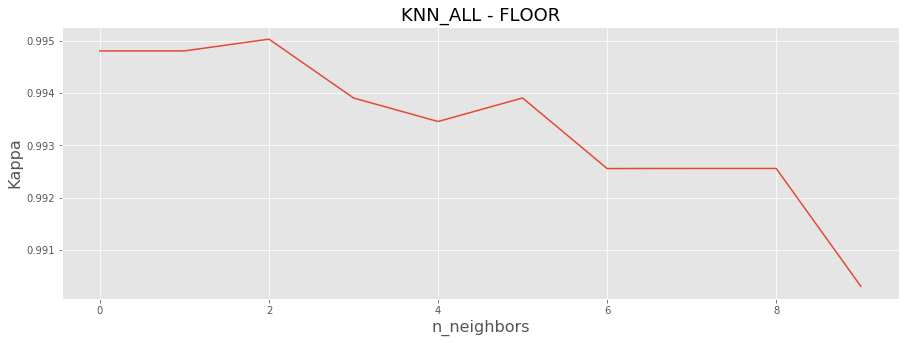

In [14]:
# plotting the kappa values against k values
KNN_ALL_FL_curveKA = pd.DataFrame(KNN_ALL_FL_ka_val)
KNN_ALL_FL_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_FL_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_ALL - BUILDINGID

In [15]:
KNN_ALL_BLDG_start = timeit.default_timer() # start computing time

KNN_ALL_BLDG_r2_val = [] # to store r2 values for different k
KNN_ALL_BLDG_ac_val = [] # to store accuracy values for different k
KNN_ALL_BLDG_ka_val = [] # to store kappa values for different k

for KNN_ALL_BLDG in range(10):
    KNN_ALL_BLDG = KNN_ALL_BLDG + 1
    KNN_ALL_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_ALL_BLDG)

    KNN_ALL_BLDG_model.fit(X_KNN_ALL_BLDG_train, y_KNN_ALL_BLDG_train) # fit the model
    KNN_ALL_BLDG_pred = KNN_ALL_BLDG_model.predict(X_KNN_ALL_BLDG_test) # make prediction
    
    KNN_ALL_BLDG_r2 = r2_score(y_KNN_ALL_BLDG_test, KNN_ALL_BLDG_pred)
    KNN_ALL_BLDG_ac = accuracy_score(KNN_ALL_BLDG_pred, y_KNN_ALL_BLDG_test)
    KNN_ALL_BLDG_ka = cohen_kappa_score(y_KNN_ALL_BLDG_test, KNN_ALL_BLDG_pred)
    
    KNN_ALL_BLDG_r2_val.append(KNN_ALL_BLDG_r2) # store r2 values
    KNN_ALL_BLDG_ac_val.append(KNN_ALL_BLDG_ac) # store accuracy values
    KNN_ALL_BLDG_ka_val.append(KNN_ALL_BLDG_ka) # store kappa values

    print('Value (KNN_ALL_BLDG) for k=', KNN_ALL_BLDG, 'is:')    
    print('Rsqaure:', KNN_ALL_BLDG_r2)
    print('Accuracy', KNN_ALL_BLDG_ac)
    print('Kappa', KNN_ALL_BLDG_ka)

print ()
KNN_ALL_BLDG_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_ALL_BLDG = neighbors.KNeighborsClassifier()
KNN_ALL_BLDG_model = GridSearchCV(KNN_ALL_BLDG, KNN_ALL_BLDG_params, cv=5)
KNN_ALL_BLDG_model.fit(X_KNN_ALL_BLDG_train, y_KNN_ALL_BLDG_train)
print ('BEST   :', KNN_ALL_BLDG_model.best_params_)

print ()
KNN_ALL_BLDG_stop = timeit.default_timer() # stop computing time
KNN_ALL_BLDG_t = (KNN_ALL_BLDG_stop - KNN_ALL_BLDG_start)/60
print ('Time in min: ', round(KNN_ALL_BLDG_t, 3))

Value (KNN_ALL_BLDG) for k= 1 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 2 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 3 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 4 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 5 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 6 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 7 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 8 is:
Rsqaure: 0.99637649550917
Accuracy 0.9974093264248705
Kappa 0.995942324096596
Value (KNN_ALL_BLDG) for k= 9 is:
Rsqaure: 0.9973427633733913
Accuracy 0.9981001727115717
Kappa 0.997019

In [16]:
KNN_ALL_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_ALL_BLDG_model.fit(X_KNN_ALL_BLDG_train, y_KNN_ALL_BLDG_train)  # fit the model
KNN_ALL_BLDG_pred = KNN_ALL_BLDG_model.predict(X_KNN_ALL_BLDG_test) # make prediction

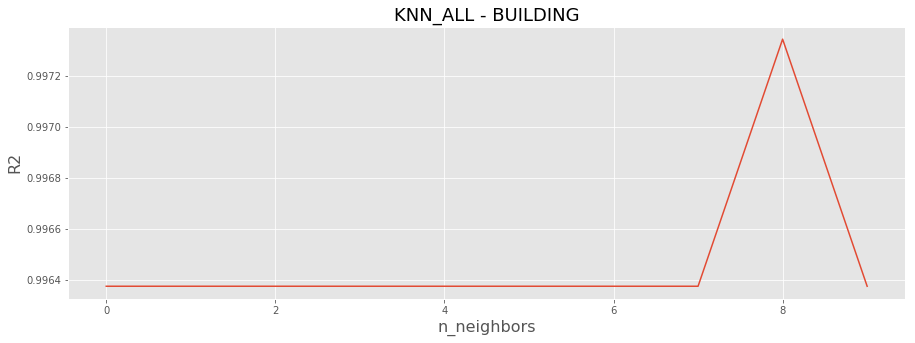

In [17]:
# plotting the r2 values against k values
KNN_ALL_BLDG_curveR2 = pd.DataFrame(KNN_ALL_BLDG_r2_val)
KNN_ALL_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_BLDG_R2.png', bbox_inches='tight')

plt.show()

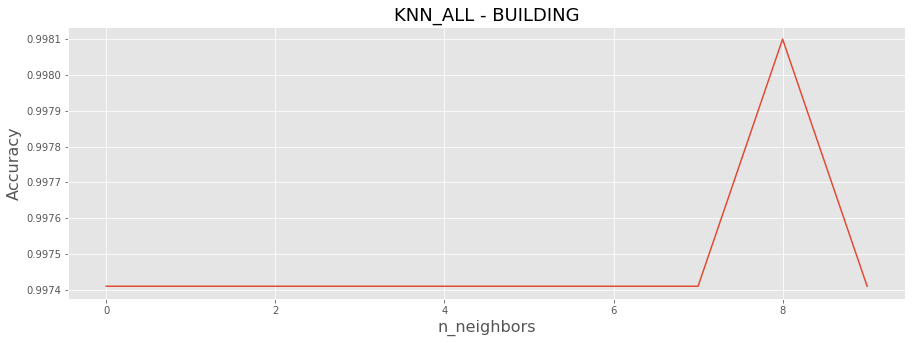

In [18]:
# plotting the accuracy values against k values
KNN_ALL_BLDG_curveAC = pd.DataFrame(KNN_ALL_BLDG_ac_val)
KNN_ALL_BLDG_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - BUILDING', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_BLDG_ACCURACY.png', bbox_inches='tight')

plt.show()

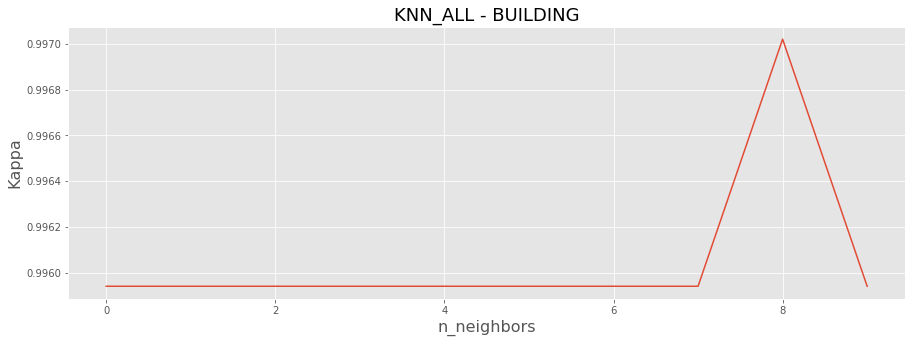

In [19]:
# plotting the kappa values against k values
KNN_ALL_BLDG_curveKA = pd.DataFrame(KNN_ALL_BLDG_ka_val)
KNN_ALL_BLDG_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - BUILDING', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_BLDG_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_ALL - ABSOLUTE_LONGITUDE

In [20]:
KNN_ALL_LON_start = timeit.default_timer() # start computing time

KNN_ALL_LON_rmse_val = [] # to store rmse values for different k
KNN_ALL_LON_r2_val = [] # to store r2 values for different k

for KNN_ALL_LON in range(10):
    KNN_ALL_LON = KNN_ALL_LON + 1
    KNN_ALL_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_ALL_LON)

    KNN_ALL_LON_model.fit(X_KNN_ALL_LON_train, y_KNN_ALL_LON_train)  # fit the model
    KNN_ALL_LON_pred = KNN_ALL_LON_model.predict(X_KNN_ALL_LON_test) # make prediction
    
    KNN_ALL_LON_rmse = sqrt(mean_squared_error(y_KNN_ALL_LON_test, KNN_ALL_LON_pred))
    KNN_ALL_LON_r2 = r2_score(y_KNN_ALL_LON_test, KNN_ALL_LON_pred)
    
    KNN_ALL_LON_rmse_val.append(KNN_ALL_LON_rmse) #store rmse values
    KNN_ALL_LON_r2_val.append(KNN_ALL_LON_r2) #store r2 values

    print('Value (KNN_ALL_LON) for k=', KNN_ALL_LON, 'is:')    
    print('RMSE   :', KNN_ALL_LON_rmse)
    print('Rsqaure:', KNN_ALL_LON_r2)

print ()
KNN_ALL_LON_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_ALL_LON = neighbors.KNeighborsRegressor()
KNN_ALL_LON_model = GridSearchCV(KNN_ALL_LON, KNN_ALL_LON_params, cv=5)
KNN_ALL_LON_model.fit(X_KNN_ALL_LON_train, y_KNN_ALL_LON_train)
print ('BEST   :', KNN_ALL_LON_model.best_params_)

print ()
KNN_ALL_LON_stop = timeit.default_timer() # stop computing time
KNN_ALL_LON_t = (KNN_ALL_LON_stop - KNN_ALL_LON_start)/60
print ('Time in min: ', round(KNN_ALL_LON_t, 3))

Value (KNN_ALL_LON) for k= 1 is:
RMSE   : 9.055623392772954
Rsqaure: 0.994789574206991
Value (KNN_ALL_LON) for k= 2 is:
RMSE   : 9.253737479226498
Rsqaure: 0.9945590985559625
Value (KNN_ALL_LON) for k= 3 is:
RMSE   : 7.296961484833838
Rsqaure: 0.9966168549554505
Value (KNN_ALL_LON) for k= 4 is:
RMSE   : 7.615409521424227
Rsqaure: 0.9963151226679694
Value (KNN_ALL_LON) for k= 5 is:
RMSE   : 7.9911462385078735
Rsqaure: 0.9959425360825408
Value (KNN_ALL_LON) for k= 6 is:
RMSE   : 7.7680125672069185
Rsqaure: 0.9961659625673236
Value (KNN_ALL_LON) for k= 7 is:
RMSE   : 7.667929197587834
Rsqaure: 0.9962641218915668
Value (KNN_ALL_LON) for k= 8 is:
RMSE   : 7.515275655613227
Rsqaure: 0.9964113893686781
Value (KNN_ALL_LON) for k= 9 is:
RMSE   : 7.576028418642456
Rsqaure: 0.9963531348908385
Value (KNN_ALL_LON) for k= 10 is:
RMSE   : 7.8005427861605074
Rsqaure: 0.9961337836216007

BEST   : {'n_neighbors': 3}

Time in min:  11.765


In [21]:
KNN_ALL_LON_model = neighbors.KNeighborsRegressor(n_neighbors = 2)

KNN_ALL_LON_model.fit(X_KNN_ALL_LON_train, y_KNN_ALL_LON_train)  # fit the model
KNN_ALL_LON_pred = KNN_ALL_LON_model.predict(X_KNN_ALL_LON_test) # make prediction

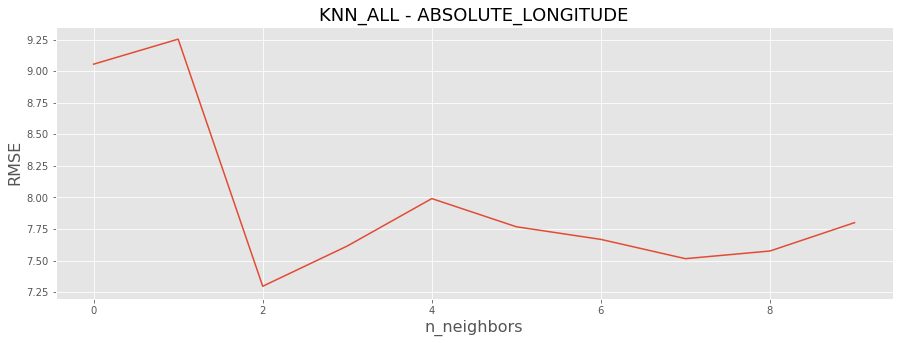

In [22]:
# plotting the rmse values against k values
KNN_ALL_LON_curveRMSE = pd.DataFrame(KNN_ALL_LON_rmse_val)
KNN_ALL_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_LON_RMSE.png', bbox_inches='tight')

plt.show()

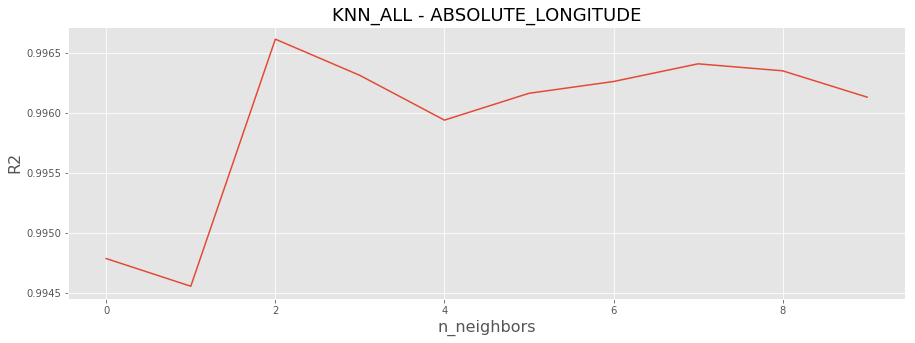

In [23]:
# plotting the r2 values against k values
KNN_ALL_LON_curveR2 = pd.DataFrame(KNN_ALL_LON_r2_val)
KNN_ALL_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_LON_R2.png', bbox_inches='tight')

plt.show()

#### KNN_ALL - ABSOLUTE_LATITUDE

In [24]:
KNN_ALL_LAT_start = timeit.default_timer() # start computing time

KNN_ALL_LAT_rmse_val = [] # to store rmse values for different k
KNN_ALL_LAT_r2_val = [] # to store r2 values for different k

for KNN_ALL_LAT in range(10):
    KNN_ALL_LAT = KNN_ALL_LAT + 1
    KNN_ALL_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_ALL_LAT)

    KNN_ALL_LAT_model.fit(X_KNN_ALL_LAT_train, y_KNN_ALL_LAT_train)  # fit the model
    KNN_ALL_LAT_pred = KNN_ALL_LAT_model.predict(X_KNN_ALL_LAT_test) # make prediction
    
    KNN_ALL_LAT_rmse = sqrt(mean_squared_error(y_KNN_ALL_LAT_test, KNN_ALL_LAT_pred))
    KNN_ALL_LAT_r2 = r2_score(y_KNN_ALL_LAT_test, KNN_ALL_LAT_pred)
    
    KNN_ALL_LAT_rmse_val.append(KNN_ALL_LAT_rmse) # store rmse values
    KNN_ALL_LAT_r2_val.append(KNN_ALL_LAT_r2) # store r2 values

    print('Value (KNN_ALL_LAT) for k=', KNN_ALL_LAT, 'is:')    
    print('RMSE   :', KNN_ALL_LAT_rmse)
    print('Rsqaure:', KNN_ALL_LAT_r2)

print ()
KNN_ALL_LAT_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_ALL_LAT = neighbors.KNeighborsRegressor()
KNN_ALL_LAT_model = GridSearchCV(KNN_ALL_LAT, KNN_ALL_LAT_params, cv=5)
KNN_ALL_LAT_model.fit(X_KNN_ALL_LAT_train, y_KNN_ALL_LAT_train)
print ('BEST   :', KNN_ALL_LAT_model.best_params_)

print ()
KNN_ALL_LAT_stop = timeit.default_timer() # stop computing time
KNN_ALL_LAT_t = (KNN_ALL_LAT_stop - KNN_ALL_LAT_start)/60
print ('Time in min: ', round(KNN_ALL_LAT_t, 3))

Value (KNN_ALL_LAT) for k= 1 is:
RMSE   : 7.78470974216731
Rsqaure: 0.986840838235672
Value (KNN_ALL_LAT) for k= 2 is:
RMSE   : 7.884019253761873
Rsqaure: 0.9865029539513519
Value (KNN_ALL_LAT) for k= 3 is:
RMSE   : 5.265507071321309
Rsqaure: 0.9939796217532357
Value (KNN_ALL_LAT) for k= 4 is:
RMSE   : 5.783065481550203
Rsqaure: 0.9927379439450826
Value (KNN_ALL_LAT) for k= 5 is:
RMSE   : 6.211179413900159
Rsqaure: 0.9916229419341815
Value (KNN_ALL_LAT) for k= 6 is:
RMSE   : 5.625350425947428
Rsqaure: 0.9931286425640538
Value (KNN_ALL_LAT) for k= 7 is:
RMSE   : 5.327698701391001
Rsqaure: 0.9938365668573194
Value (KNN_ALL_LAT) for k= 8 is:
RMSE   : 5.185547724353576
Rsqaure: 0.9941610783412802
Value (KNN_ALL_LAT) for k= 9 is:
RMSE   : 5.2302759619002055
Rsqaure: 0.9940599160208053
Value (KNN_ALL_LAT) for k= 10 is:
RMSE   : 5.454762132212992
Rsqaure: 0.9935390703687922

BEST   : {'n_neighbors': 3}

Time in min:  11.094


In [25]:
KNN_ALL_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = 2)

KNN_ALL_LAT_model.fit(X_KNN_ALL_LAT_train, y_KNN_ALL_LAT_train)  # fit the model
KNN_ALL_LAT_pred = KNN_ALL_LAT_model.predict(X_KNN_ALL_LAT_test) # make prediction

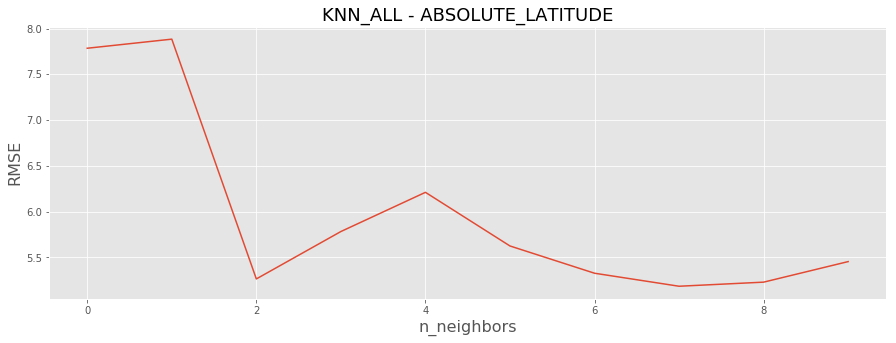

In [26]:
# plotting the rmse values against k values
KNN_ALL_LAT_curveRMSE = pd.DataFrame(KNN_ALL_LAT_rmse_val)
KNN_ALL_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_LAT_RMSE.png', bbox_inches='tight')

plt.show()

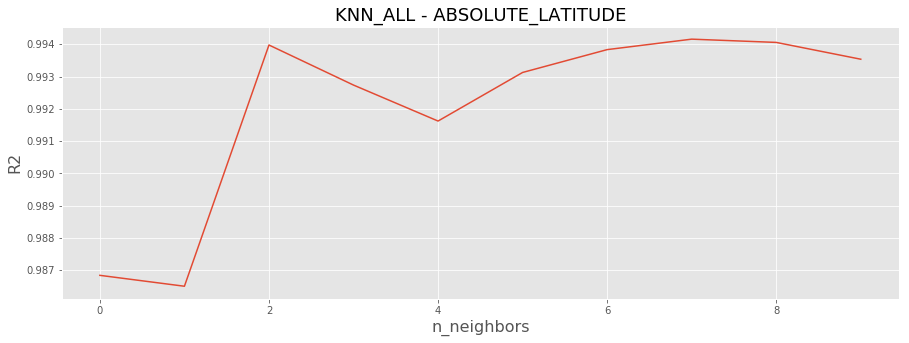

In [27]:
# plotting the r2 values against k values
KNN_ALL_LAT_curveR2 = pd.DataFrame(KNN_ALL_LAT_r2_val)
KNN_ALL_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/01_KNN_ALL_LAT_R2.png', bbox_inches='tight')

plt.show()

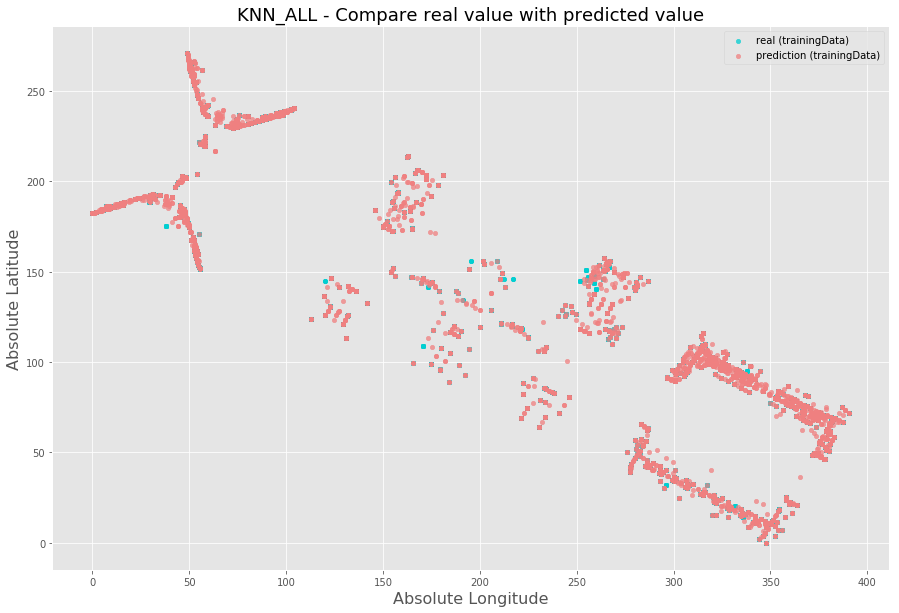

In [28]:
REAL_ALL = pd.DataFrame()
REAL_ALL['ABSOLUTE_LONGITUDE'] = y_KNN_ALL_LON
REAL_ALL['ABSOLUTE_LATITUDE'] = y_KNN_ALL_LAT
ax1 = REAL_ALL.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'real (trainingData)',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)

NEW_ALL = pd.DataFrame()
NEW_ALL['ABSOLUTE_LONGITUDE'] = KNN_ALL_LON_pred
NEW_ALL['ABSOLUTE_LATITUDE'] = KNN_ALL_LAT_pred
ax2 = NEW_ALL.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                   label = 'prediction (trainingData)',
                   color="lightcoral",
                   figsize=(15,10),
                   alpha=0.75,
                   ax=ax1)

plt.title("KNN_ALL - Compare real value with predicted value", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/01_KNN_ALL_REAL_NEW.png', bbox_inches='tight')

plt.show()

### KNN_SUB - BLDG01 <a id='KNN_SUB_BLDG01'></a>

#### KNN - individual by Building and Floor

In [29]:
# Create subset for each building and floor (validationData)

# Training Data
print ('Create subset for each Building (BLDG) and Floor (FL) - validationData')
print ()
print ('dimensions (rows, column)')
# Building 00
BLDG00_df_train = df_train[(df_train.BUILDINGID == 0)]
BLDG00_FL00_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 0)]
BLDG00_FL01_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 1)]
BLDG00_FL02_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 2)]
BLDG00_FL03_df_train = df_train[(df_train.BUILDINGID == 0) & (df_train.FLOOR == 3)]
# Building 01
BLDG01_df_train = df_train[(df_train.BUILDINGID == 1)]
BLDG01_FL00_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 0)]
BLDG01_FL01_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 1)]
BLDG01_FL02_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 2)]
BLDG01_FL03_df_train = df_train[(df_train.BUILDINGID == 1) & (df_train.FLOOR == 3)]
# Building 02
BLDG02_df_train = df_train[(df_train.BUILDINGID == 2)]
BLDG02_FL00_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 0)]
BLDG02_FL01_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 1)]
BLDG02_FL02_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 2)]
BLDG02_FL03_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 3)]
BLDG02_FL04_df_train = df_train[(df_train.BUILDINGID == 2) & (df_train.FLOOR == 4)]

# Floor
FL00_df_train = df_train[(df_train.FLOOR == 0)]
FL01_df_train = df_train[(df_train.FLOOR == 1)]
FL02_df_train = df_train[(df_train.FLOOR == 2)]
FL03_df_train = df_train[(df_train.FLOOR == 3)]
FL04_df_train = df_train[(df_train.FLOOR == 4)]

print ('BLDG00:', BLDG00_df_train.shape)
print ('BLDG00_FL00:', BLDG00_FL00_df_train.shape)
print ('BLDG00_FL01:', BLDG00_FL01_df_train.shape)
print ('BLDG00_FL02:', BLDG00_FL02_df_train.shape)
print ('BLDG00_FL03:', BLDG00_FL03_df_train.shape)
print ()
print ('BLDG01:', BLDG01_df_train.shape)
print ('BLDG01_FL00:', BLDG01_FL00_df_train.shape)
print ('BLDG01_FL01:', BLDG01_FL01_df_train.shape)
print ('BLDG01_FL02:', BLDG01_FL02_df_train.shape)
print ('BLDG01_FL03:', BLDG01_FL03_df_train.shape)
print ()
print ('BLDG02:', BLDG02_df_train.shape)
print ('BLDG02_FL00:', BLDG02_FL00_df_train.shape)
print ('BLDG02_FL01:', BLDG02_FL01_df_train.shape)
print ('BLDG02_FL02:', BLDG02_FL02_df_train.shape)
print ('BLDG02_FL03:', BLDG02_FL03_df_train.shape)
print ('BLDG02_FL04:', BLDG02_FL04_df_train.shape)
print ()
print ('FL00:', FL00_df_train.shape)
print ('FL01:', FL01_df_train.shape)
print ('FL02:', FL02_df_train.shape)
print ('FL03:', FL03_df_train.shape)
print ('FL04:', FL04_df_train.shape)

Create subset for each Building (BLDG) and Floor (FL) - validationData

dimensions (rows, column)
BLDG00: (5246, 388)
BLDG00_FL00: (1057, 388)
BLDG00_FL01: (1356, 388)
BLDG00_FL02: (1443, 388)
BLDG00_FL03: (1390, 388)

BLDG01: (4938, 388)
BLDG01_FL00: (1333, 388)
BLDG01_FL01: (1266, 388)
BLDG01_FL02: (1396, 388)
BLDG01_FL03: (943, 388)

BLDG02: (9116, 388)
BLDG02_FL00: (1942, 388)
BLDG02_FL01: (2162, 388)
BLDG02_FL02: (1577, 388)
BLDG02_FL03: (2708, 388)
BLDG02_FL04: (727, 388)

FL00: (4332, 388)
FL01: (4784, 388)
FL02: (4416, 388)
FL03: (5041, 388)
FL04: (727, 388)


In [30]:
# Create subset for each building and floor (trainingData)

# Test Data
print ('Create subset for each Building (BLDG) and Floor (FL) - trainingData')
print ()
print ('dimensions (rows, column)')
# Building 00
BLDG00_df_valid = df_valid[(df_valid.BUILDINGID == 0)]
BLDG00_FL00_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 0)]
BLDG00_FL01_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 1)]
BLDG00_FL02_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 2)]
BLDG00_FL03_df_valid = df_valid[(df_valid.BUILDINGID == 0) & (df_valid.FLOOR == 3)]
# Building 01
BLDG01_df_valid = df_valid[(df_valid.BUILDINGID == 1)]
BLDG01_FL00_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 0)]
BLDG01_FL01_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 1)]
BLDG01_FL02_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 2)]
BLDG01_FL03_df_valid = df_valid[(df_valid.BUILDINGID == 1) & (df_valid.FLOOR == 3)]
# Building 02
BLDG02_df_valid = df_valid[(df_valid.BUILDINGID == 2)]
BLDG02_FL00_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 0)]
BLDG02_FL01_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 1)]
BLDG02_FL02_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 2)]
BLDG02_FL03_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 3)]
BLDG02_FL04_df_valid = df_valid[(df_valid.BUILDINGID == 2) & (df_valid.FLOOR == 4)]

# Floor
FL00_df_valid = df_valid[(df_valid.FLOOR == 0)]
FL01_df_valid = df_valid[(df_valid.FLOOR == 1)]
FL02_df_valid = df_valid[(df_valid.FLOOR == 2)]
FL03_df_valid = df_valid[(df_valid.FLOOR == 3)]
FL04_df_valid = df_valid[(df_valid.FLOOR == 4)]

print ('BLDG00:', BLDG00_df_valid.shape)
print ('BLDG00_FL00:', BLDG00_FL00_df_valid.shape)
print ('BLDG00_FL01:', BLDG00_FL01_df_valid.shape)
print ('BLDG00_FL02:', BLDG00_FL02_df_valid.shape)
print ('BLDG00_FL03:', BLDG00_FL03_df_valid.shape)
print ()
print ('BLDG01:', BLDG01_df_valid.shape)
print ('BLDG01_FL00:', BLDG01_FL00_df_valid.shape)
print ('BLDG01_FL01:', BLDG01_FL01_df_valid.shape)
print ('BLDG01_FL02:', BLDG01_FL02_df_valid.shape)
print ('BLDG01_FL03:', BLDG01_FL03_df_valid.shape)
print ()
print ('BLDG02:', BLDG02_df_valid.shape)
print ('BLDG02_FL00:', BLDG02_FL00_df_valid.shape)
print ('BLDG02_FL01:', BLDG02_FL01_df_valid.shape)
print ('BLDG02_FL02:', BLDG02_FL02_df_valid.shape)
print ('BLDG02_FL03:', BLDG02_FL03_df_valid.shape)
print ('BLDG02_FL04:', BLDG02_FL04_df_valid.shape)
print ()
print ('FL00:', FL00_df_valid.shape)
print ('FL01:', FL01_df_valid.shape)
print ('FL02:', FL02_df_valid.shape)
print ('FL03:', FL03_df_valid.shape)
print ('FL04:', FL04_df_valid.shape)

Create subset for each Building (BLDG) and Floor (FL) - trainingData

dimensions (rows, column)
BLDG00: (536, 388)
BLDG00_FL00: (78, 388)
BLDG00_FL01: (208, 388)
BLDG00_FL02: (165, 388)
BLDG00_FL03: (85, 388)

BLDG01: (307, 388)
BLDG01_FL00: (30, 388)
BLDG01_FL01: (143, 388)
BLDG01_FL02: (87, 388)
BLDG01_FL03: (47, 388)

BLDG02: (266, 388)
BLDG02_FL00: (24, 388)
BLDG02_FL01: (109, 388)
BLDG02_FL02: (54, 388)
BLDG02_FL03: (40, 388)
BLDG02_FL04: (39, 388)

FL00: (132, 388)
FL01: (460, 388)
FL02: (306, 388)
FL03: (172, 388)
FL04: (39, 388)


#### KNN_SUB - BLDG01 - SPLITTING

In [31]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_SUB_BLDG01_FL = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_FL = BLDG01_df_train.iloc[:, 384].values

X_KNN_SUB_BLDG01_BLDG = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_BLDG = BLDG01_df_train.iloc[:, 385].values

X_KNN_SUB_BLDG01_LON = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_LON = BLDG01_df_train.iloc[:, 386].values

X_KNN_SUB_BLDG01_LAT = BLDG01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG01_LAT = BLDG01_df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_SUB_BLDG01_FL_train, X_KNN_SUB_BLDG01_FL_test, y_KNN_SUB_BLDG01_FL_train, y_KNN_SUB_BLDG01_FL_test = train_test_split(X_KNN_SUB_BLDG01_FL, y_KNN_SUB_BLDG01_FL, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG01_BLDG_train, X_KNN_SUB_BLDG01_BLDG_test, y_KNN_SUB_BLDG01_BLDG_train, y_KNN_SUB_BLDG01_BLDG_test = train_test_split(X_KNN_SUB_BLDG01_BLDG, y_KNN_SUB_BLDG01_BLDG, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG01_LON_train, X_KNN_SUB_BLDG01_LON_test, y_KNN_SUB_BLDG01_LON_train, y_KNN_SUB_BLDG01_LON_test = train_test_split(X_KNN_SUB_BLDG01_LON, y_KNN_SUB_BLDG01_LON, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG01_LAT_train, X_KNN_SUB_BLDG01_LAT_test, y_KNN_SUB_BLDG01_LAT_train, y_KNN_SUB_BLDG01_LAT_test = train_test_split(X_KNN_SUB_BLDG01_LAT, y_KNN_SUB_BLDG01_LAT, test_size=0.3, random_state=0)

#### KNN_SUB - BLDG01 - FLOOR

In [32]:
KNN_SUB_BLDG01_FL_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG01_FL_r2_val = [] # to store r2 values for different k
KNN_SUB_BLDG01_FL_ac_val = [] # to store accuracy values for different k
KNN_SUB_BLDG01_FL_ka_val = [] # to store kappa values for different k

for KNN_SUB_BLDG01_FL in range(10):
    KNN_SUB_BLDG01_FL = KNN_SUB_BLDG01_FL + 1
    KNN_SUB_BLDG01_FL_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_BLDG01_FL)
    
    KNN_SUB_BLDG01_FL_model.fit(X_KNN_SUB_BLDG01_FL_train, y_KNN_SUB_BLDG01_FL_train)  # fit the model
    KNN_SUB_BLDG01_FL_pred = KNN_SUB_BLDG01_FL_model.predict(X_KNN_SUB_BLDG01_FL_test) # make prediction
    
    KNN_SUB_BLDG01_FL_r2 = r2_score(y_KNN_SUB_BLDG01_FL_test, KNN_SUB_BLDG01_FL_pred)
    KNN_SUB_BLDG01_FL_ac = accuracy_score(KNN_SUB_BLDG01_FL_pred, y_KNN_SUB_BLDG01_FL_test)
    KNN_SUB_BLDG01_FL_ka = cohen_kappa_score(y_KNN_SUB_BLDG01_FL_test, KNN_SUB_BLDG01_FL_pred)
    
    KNN_SUB_BLDG01_FL_r2_val.append(KNN_SUB_BLDG01_FL_r2) # store r2 values
    KNN_SUB_BLDG01_FL_ac_val.append(KNN_SUB_BLDG01_FL_ac) # store accuracy values
    KNN_SUB_BLDG01_FL_ka_val.append(KNN_SUB_BLDG01_FL_ka) # store kappa values
 
    print('Value (KNN_SUB_BLDG01_FL) for k=', KNN_SUB_BLDG01_FL, 'is:')    
    print('Rsqaure:', KNN_SUB_BLDG01_FL_r2)
    print('Accuracy', KNN_SUB_BLDG01_FL_ac)
    print('Kappa', KNN_SUB_BLDG01_FL_ka)

print ()
KNN_SUB_BLDG01_FL_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG01_FL = neighbors.KNeighborsClassifier()
KNN_SUB_BLDG01_FL_model = GridSearchCV(KNN_SUB_BLDG01_FL, KNN_SUB_BLDG01_FL_params, cv=5)
KNN_SUB_BLDG01_FL_model.fit(X_KNN_SUB_BLDG01_FL_train, y_KNN_SUB_BLDG01_FL_train)
print ('BEST   :', KNN_SUB_BLDG01_FL_model.best_params_)

print ()
KNN_SUB_BLDG01_FL_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG01_FL_t = (KNN_SUB_BLDG01_FL_stop - KNN_SUB_BLDG01_FL_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG01_FL_t, 3))

Value (KNN_SUB_BLDG01_FL) for k= 1 is:
Rsqaure: 0.9982786016949152
Accuracy 0.9979757085020243
Kappa 0.9972876715337284
Value (KNN_SUB_BLDG01_FL) for k= 2 is:
Rsqaure: 0.9982786016949152
Accuracy 0.9979757085020243
Kappa 0.9972876715337284
Value (KNN_SUB_BLDG01_FL) for k= 3 is:
Rsqaure: 0.9948358050847458
Accuracy 0.9959514170040485
Kappa 0.9945757732512176
Value (KNN_SUB_BLDG01_FL) for k= 4 is:
Rsqaure: 0.9959834039548022
Accuracy 0.9973009446693657
Kappa 0.996383795891875
Value (KNN_SUB_BLDG01_FL) for k= 5 is:
Rsqaure: 0.9936882062146892
Accuracy 0.9966261808367072
Kappa 0.9954800371356733
Value (KNN_SUB_BLDG01_FL) for k= 6 is:
Rsqaure: 0.9936882062146892
Accuracy 0.9966261808367072
Kappa 0.9954800371356733
Value (KNN_SUB_BLDG01_FL) for k= 7 is:
Rsqaure: 0.9896716101694916
Accuracy 0.9939271255060729
Kappa 0.9918647714963258
Value (KNN_SUB_BLDG01_FL) for k= 8 is:
Rsqaure: 0.9902454096045198
Accuracy 0.9946018893387314
Kappa 0.9927682711556737
Value (KNN_SUB_BLDG01_FL) for k= 9 is:
Rs

In [33]:
KNN_SUB_BLDG01_FL_model = neighbors.KNeighborsClassifier(n_neighbors = 3)

KNN_SUB_BLDG01_FL_model.fit(X_KNN_SUB_BLDG01_FL_train, y_KNN_SUB_BLDG01_FL_train)  # fit the model
KNN_SUB_BLDG01_FL_pred = KNN_SUB_BLDG01_FL_model.predict(X_KNN_SUB_BLDG01_FL_test) # make prediction

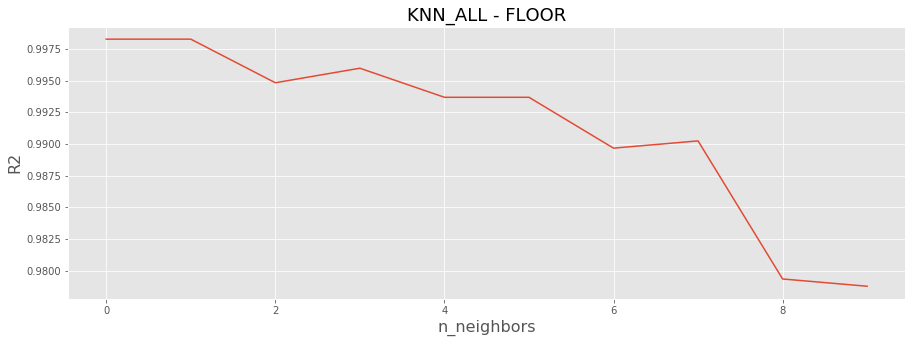

In [34]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_FL_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_FL_r2_val)
KNN_SUB_BLDG01_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_FL_R2.png', bbox_inches='tight')

plt.show()

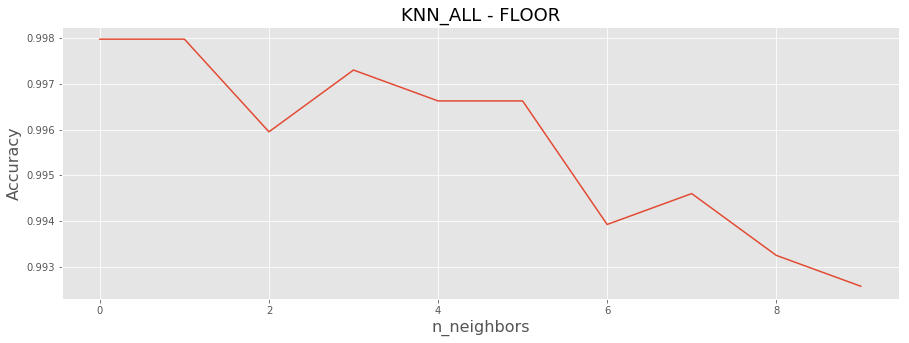

In [35]:
# plotting the accuracy values against k values
KNN_SUB_BLDG01_FL_curveAC = pd.DataFrame(KNN_SUB_BLDG01_FL_ac_val)
KNN_SUB_BLDG01_FL_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_FL_ACCURACY.png', bbox_inches='tight')

plt.show()

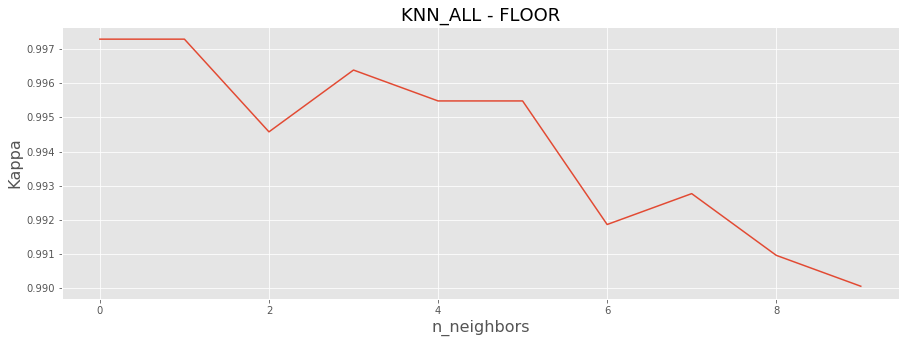

In [36]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_FL_curveKA = pd.DataFrame(KNN_SUB_BLDG01_FL_ka_val)
KNN_SUB_BLDG01_FL_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_ALL - FLOOR', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_FL_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG01 - BUILDINGID

In [37]:
KNN_SUB_BLDG01_BLDG_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG01_BLDG_r2_val = [] # to store r2 values for different k
KNN_SUB_BLDG01_BLDG_ac_val = [] # to store accuracy values for different k
KNN_SUB_BLDG01_BLDG_ka_val = [] # to store kappa values for different k

for KNN_SUB_BLDG01_BLDG in range(10):
    KNN_SUB_BLDG01_BLDG = KNN_SUB_BLDG01_BLDG + 1
    KNN_SUB_BLDG01_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_BLDG01_BLDG)
    
    KNN_SUB_BLDG01_BLDG_model.fit(X_KNN_SUB_BLDG01_BLDG_train, y_KNN_SUB_BLDG01_BLDG_train)  # fit the model
    KNN_SUB_BLDG01_BLDG_pred = KNN_SUB_BLDG01_BLDG_model.predict(X_KNN_SUB_BLDG01_BLDG_test) # make prediction
    
    KNN_SUB_BLDG01_BLDG_r2 = r2_score(y_KNN_SUB_BLDG01_BLDG_test, KNN_SUB_BLDG01_BLDG_pred)
    KNN_SUB_BLDG01_BLDG_ac = accuracy_score(KNN_SUB_BLDG01_BLDG_pred, y_KNN_SUB_BLDG01_BLDG_test)
    KNN_SUB_BLDG01_BLDG_ka = cohen_kappa_score(y_KNN_SUB_BLDG01_BLDG_test, KNN_SUB_BLDG01_BLDG_pred)
    
    KNN_SUB_BLDG01_BLDG_r2_val.append(KNN_SUB_BLDG01_BLDG_r2) # store r2 values
    KNN_SUB_BLDG01_BLDG_ac_val.append(KNN_SUB_BLDG01_BLDG_ac) # store accuracy values
    KNN_SUB_BLDG01_BLDG_ka_val.append(KNN_SUB_BLDG01_BLDG_ka) # store kappa values
 
    print('Value (KNN_SUB_BLDG01_BLDG) for k=', KNN_SUB_BLDG01_BLDG, 'is:')    
    print('Rsqaure:', KNN_SUB_BLDG01_BLDG_r2)
    print('Accuracy', KNN_SUB_BLDG01_BLDG_ac)
    print('Kappa', KNN_SUB_BLDG01_BLDG_ka)

print ()
KNN_SUB_BLDG01_BLDG_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG01_BLDG = neighbors.KNeighborsClassifier()
KNN_SUB_BLDG01_BLDG_model = GridSearchCV(KNN_SUB_BLDG01_BLDG, KNN_SUB_BLDG01_BLDG_params, cv=5)
KNN_SUB_BLDG01_BLDG_model.fit(X_KNN_SUB_BLDG01_BLDG_train, y_KNN_SUB_BLDG01_BLDG_train)
print ('BEST   :', KNN_SUB_BLDG01_BLDG_model.best_params_)

print ()
KNN_SUB_BLDG01_BLDG_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG01_BLDG_t = (KNN_SUB_BLDG01_BLDG_stop - KNN_SUB_BLDG01_BLDG_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG01_BLDG_t, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 7 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 8 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 9 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG01_BLDG) for k= 10 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan

BEST   : {'n_neighbors': 2}

Time in min:  0.718


In [38]:
KNN_SUB_BLDG01_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_BLDG01_BLDG_model.fit(X_KNN_SUB_BLDG01_BLDG_train, y_KNN_SUB_BLDG01_BLDG_train)  # fit the model
KNN_SUB_BLDG01_BLDG_pred = KNN_SUB_BLDG01_BLDG_model.predict(X_KNN_SUB_BLDG01_BLDG_test) # make prediction

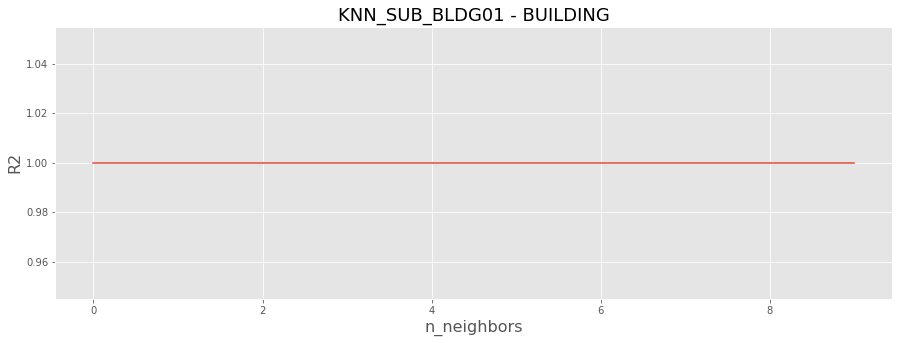

In [39]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_BLDG_r2_val)
KNN_SUB_BLDG01_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_BLDG_R2.png', bbox_inches='tight')

plt.show()

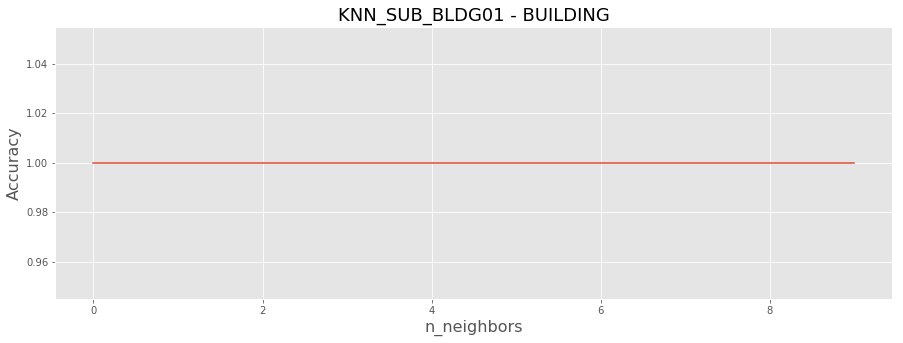

In [40]:
# plotting the accuracy values against k values
KNN_SUB_BLDG01_BLDG_curveAC = pd.DataFrame(KNN_SUB_BLDG01_BLDG_ac_val)
KNN_SUB_BLDG01_BLDG_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - BUILDING', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_BLDG_ACCURACY.png', bbox_inches='tight')

plt.show()

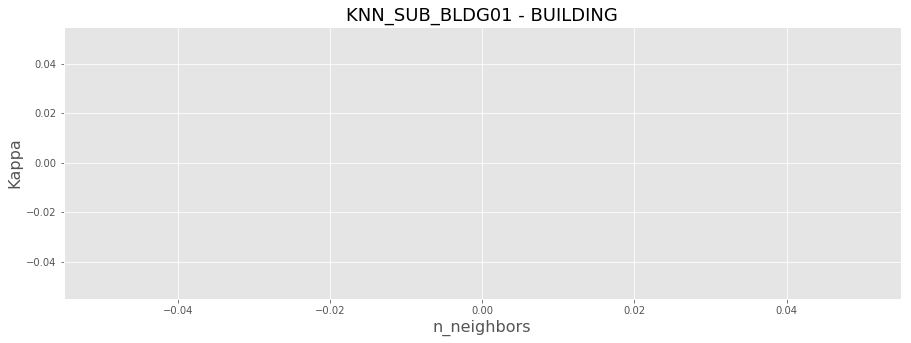

In [41]:
# plotting the kappa values against k values
KNN_SUB_BLDG01_BLDG_curveKA = pd.DataFrame(KNN_SUB_BLDG01_BLDG_ka_val)
KNN_SUB_BLDG01_BLDG_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - BUILDING', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_BLDG_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG01 - ABSOLUTE_LONGITUDE

In [42]:
KNN_SUB_BLDG01_LON_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG01_LON_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG01_LON_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG01_LON in range(10):
    KNN_SUB_BLDG01_LON = KNN_SUB_BLDG01_LON + 1
    KNN_SUB_BLDG01_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG01_LON)

    KNN_SUB_BLDG01_LON_model.fit(X_KNN_SUB_BLDG01_LON_train, y_KNN_SUB_BLDG01_LON_train)  # fit the model
    KNN_SUB_BLDG01_LON_pred = KNN_SUB_BLDG01_LON_model.predict(X_KNN_SUB_BLDG01_LON_test) #make prediction
    
    KNN_SUB_BLDG01_LON_rmse = sqrt(mean_squared_error(y_KNN_SUB_BLDG01_LON_test, KNN_SUB_BLDG01_LON_pred))
    KNN_SUB_BLDG01_LON_r2 = r2_score(y_KNN_SUB_BLDG01_LON_test, KNN_SUB_BLDG01_LON_pred)
    
    KNN_SUB_BLDG01_LON_rmse_val.append(KNN_SUB_BLDG01_LON_rmse) # store rmse values
    KNN_SUB_BLDG01_LON_r2_val.append(KNN_SUB_BLDG01_LON_r2) # store r2 values

    print('Value (LON) for k=', KNN_SUB_BLDG01_LON, 'is:')    
    print('RMSE   :', KNN_SUB_BLDG01_LON_rmse)
    print('Rsqaure:', KNN_SUB_BLDG01_LON_r2)
    
print ()
KNN_SUB_BLDG01_LON_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG01_LON = neighbors.KNeighborsRegressor()
KNN_SUB_BLDG01_LON_model = GridSearchCV(KNN_SUB_BLDG01_LON, KNN_SUB_BLDG01_LON_params, cv=5)
KNN_SUB_BLDG01_LON_model.fit(X_KNN_SUB_BLDG01_LON_train, y_KNN_SUB_BLDG01_LON_train)
print ('BEST   :', KNN_SUB_BLDG01_LON_model.best_params_)

print ()
KNN_SUB_BLDG01_LON_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG01_LON_t = (KNN_SUB_BLDG01_LON_stop - KNN_SUB_BLDG01_LON_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG01_LON_t, 3))

Value (LON) for k= 1 is:
RMSE   : 5.141924865519446
Rsqaure: 0.9897607050273847
Value (LON) for k= 2 is:
RMSE   : 4.801654937914652
Rsqaure: 0.9910710478487404
Value (LON) for k= 3 is:
RMSE   : 5.234436651182142
Rsqaure: 0.9893889466536455
Value (LON) for k= 4 is:
RMSE   : 5.583680709100822
Rsqaure: 0.9879257613991793
Value (LON) for k= 5 is:
RMSE   : 6.026354122996608
Rsqaure: 0.9859353833927795
Value (LON) for k= 6 is:
RMSE   : 6.344341944381864
Rsqaure: 0.9844119508598058
Value (LON) for k= 7 is:
RMSE   : 6.705444878688329
Rsqaure: 0.9825869921777654
Value (LON) for k= 8 is:
RMSE   : 6.99272735016223
Rsqaure: 0.9810629732801984
Value (LON) for k= 9 is:
RMSE   : 7.258980085186035
Rsqaure: 0.9795934394866956
Value (LON) for k= 10 is:
RMSE   : 7.32279753744283
Rsqaure: 0.9792330529697405

BEST   : {'n_neighbors': 2}

Time in min:  0.716


In [43]:
KNN_SUB_BLDG01_LON_model = neighbors.KNeighborsRegressor(n_neighbors = 2)

KNN_SUB_BLDG01_LON_model.fit(X_KNN_SUB_BLDG01_LON_train, y_KNN_SUB_BLDG01_LON_train)  # fit the model
KNN_SUB_BLDG01_LON_pred = KNN_SUB_BLDG01_LON_model.predict(X_KNN_SUB_BLDG01_LON_test) # make prediction

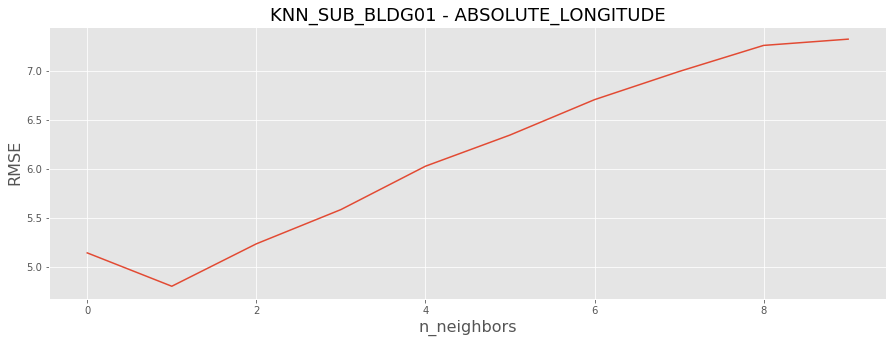

In [44]:
# plotting the rmse values against k values
KNN_SUB_BLDG01_LON_curveRMSE = pd.DataFrame(KNN_SUB_BLDG01_LON_rmse_val)
KNN_SUB_BLDG01_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_LON_RMSE.png', bbox_inches='tight')

plt.show()

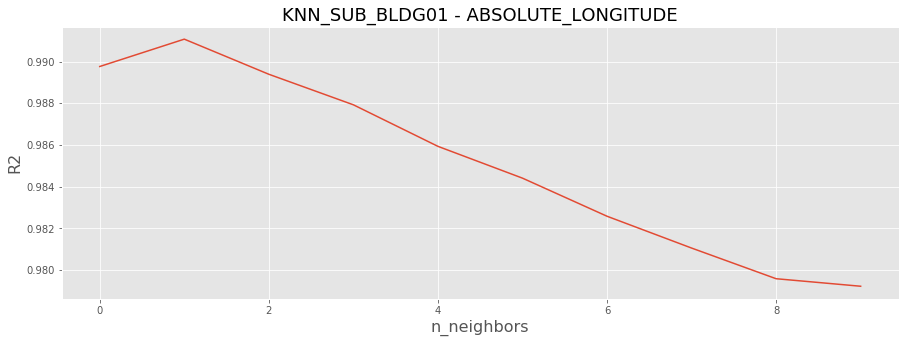

In [45]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_LON_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_LON_r2_val)
KNN_SUB_BLDG01_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_LON_R2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG01 - ABSOLUTE_LATITUDE

In [46]:
KNN_SUB_BLDG01_LAT_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG01_LAT_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG01_LAT_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG01_LAT in range(10):
    KNN_SUB_BLDG01_LAT = KNN_SUB_BLDG01_LAT + 1
    KNN_SUB_BLDG01_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG01_LAT)

    KNN_SUB_BLDG01_LAT_model.fit(X_KNN_SUB_BLDG01_LAT_train, y_KNN_SUB_BLDG01_LAT_train)  # fit the model
    KNN_SUB_BLDG01_LAT_pred = KNN_SUB_BLDG01_LAT_model.predict(X_KNN_SUB_BLDG01_LAT_test) # make prediction
    
    KNN_SUB_BLDG01_LAT_rmse = sqrt(mean_squared_error(y_KNN_SUB_BLDG01_LAT_test, KNN_SUB_BLDG01_LAT_pred))
    KNN_SUB_BLDG01_LAT_r2 = r2_score(y_KNN_SUB_BLDG01_LAT_test, KNN_SUB_BLDG01_LAT_pred)
    
    KNN_SUB_BLDG01_LAT_rmse_val.append(KNN_SUB_BLDG01_LAT_rmse) # store rmse values
    KNN_SUB_BLDG01_LAT_r2_val.append(KNN_SUB_BLDG01_LAT_r2) # store r2 values

    print('Value (KNN_SUB_BLDG01_LAT) for k=', KNN_SUB_BLDG01_LAT, 'is:')    
    print('RMSE   :', KNN_SUB_BLDG01_LAT_rmse)
    print('Rsqaure:', KNN_SUB_BLDG01_LAT_r2)

print ()
KNN_SUB_BLDG01_LAT_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG01_LAT = neighbors.KNeighborsRegressor()
KNN_SUB_BLDG01_LAT_model = GridSearchCV(KNN_SUB_BLDG01_LAT, KNN_SUB_BLDG01_LAT_params, cv=5)
KNN_SUB_BLDG01_LAT_model.fit(X_KNN_SUB_BLDG01_LAT_train, y_KNN_SUB_BLDG01_LAT_train)
print ('BEST   :', KNN_SUB_BLDG01_LAT_model.best_params_)

print ()
KNN_SUB_BLDG01_LAT_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG01_LAT_t = (KNN_SUB_BLDG01_LAT_stop - KNN_SUB_BLDG01_LAT_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG01_LAT_t, 3))

Value (KNN_SUB_BLDG01_LAT) for k= 1 is:
RMSE   : 4.621753059584066
Rsqaure: 0.9838428501196288
Value (KNN_SUB_BLDG01_LAT) for k= 2 is:
RMSE   : 4.63331487308732
Rsqaure: 0.9837619113031819
Value (KNN_SUB_BLDG01_LAT) for k= 3 is:
RMSE   : 4.394124518157089
Rsqaure: 0.9853951870890627
Value (KNN_SUB_BLDG01_LAT) for k= 4 is:
RMSE   : 4.540426011621819
Rsqaure: 0.9844064683901356
Value (KNN_SUB_BLDG01_LAT) for k= 5 is:
RMSE   : 4.452568954641502
Rsqaure: 0.9850040982391605
Value (KNN_SUB_BLDG01_LAT) for k= 6 is:
RMSE   : 4.47451569281189
Rsqaure: 0.9848559041389603
Value (KNN_SUB_BLDG01_LAT) for k= 7 is:
RMSE   : 4.5474399056156525
Rsqaure: 0.9843582544762901
Value (KNN_SUB_BLDG01_LAT) for k= 8 is:
RMSE   : 4.66014092867713
Rsqaure: 0.9835733357731983
Value (KNN_SUB_BLDG01_LAT) for k= 9 is:
RMSE   : 4.762842016725869
Rsqaure: 0.9828413296251467
Value (KNN_SUB_BLDG01_LAT) for k= 10 is:
RMSE   : 4.902216390253685
Rsqaure: 0.9818224129024185

BEST   : {'n_neighbors': 4}

Time in min:  0.719


In [47]:
KNN_SUB_BLDG01_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = 3)

KNN_SUB_BLDG01_LAT_model.fit(X_KNN_SUB_BLDG01_LAT_train, y_KNN_SUB_BLDG01_LAT_train)  # fit the model
KNN_SUB_BLDG01_LAT_pred = KNN_SUB_BLDG01_LAT_model.predict(X_KNN_SUB_BLDG01_LAT_test) # make prediction

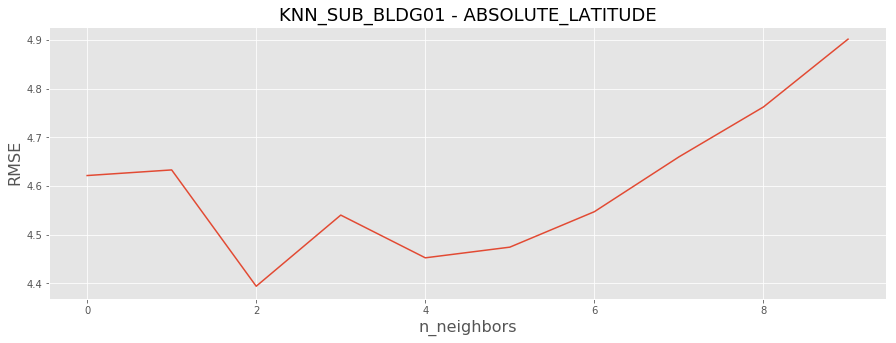

In [48]:
# plotting the rmse values against k values
KNN_SUB_BLDG01_LAT_curveRMSE = pd.DataFrame(KNN_SUB_BLDG01_LAT_rmse_val)
KNN_SUB_BLDG01_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_LAT_RMSE.png', bbox_inches='tight')

plt.show()

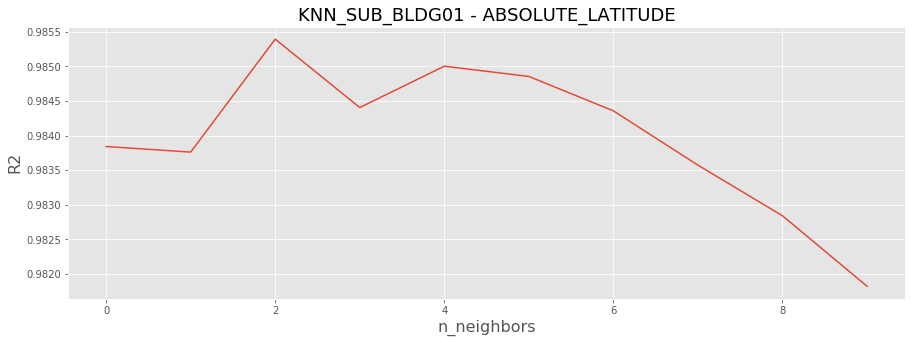

In [49]:
# plotting the r2 values against k values
KNN_SUB_BLDG01_LAT_curveR2 = pd.DataFrame(KNN_SUB_BLDG01_LAT_r2_val)
KNN_SUB_BLDG01_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/02_KNN_SUB_BLDG01_LAT_R2.png', bbox_inches='tight')

plt.show()

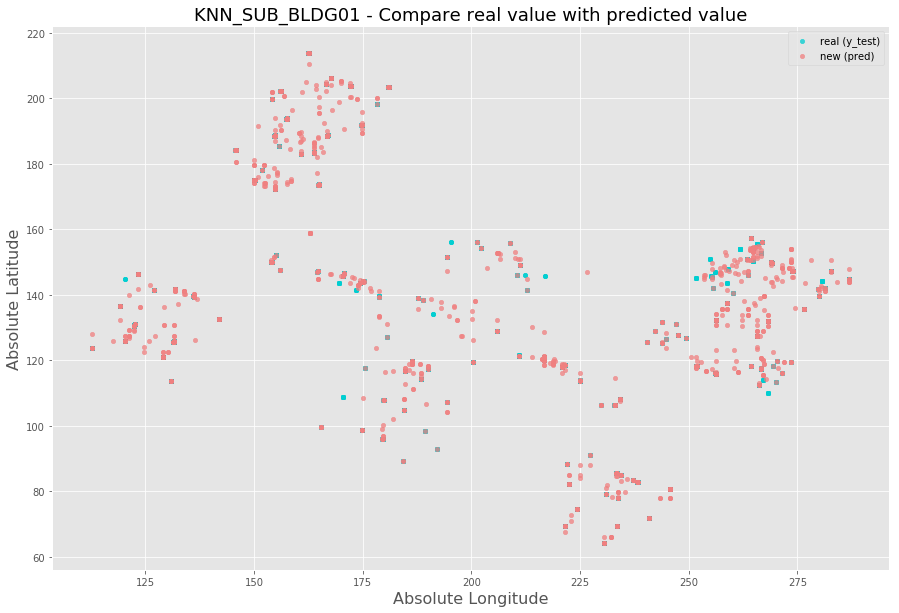

In [50]:
REAL_SUB_BLDG01 = pd.DataFrame()
REAL_SUB_BLDG01['ABSOLUTE_LONGITUDE'] = y_KNN_SUB_BLDG01_LON
REAL_SUB_BLDG01['ABSOLUTE_LATITUDE'] = y_KNN_SUB_BLDG01_LAT
ax1 = REAL_SUB_BLDG01.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'real (y_test)',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)

NEW_SUB_BLDG01 = pd.DataFrame()
NEW_SUB_BLDG01['ABSOLUTE_LONGITUDE'] = KNN_SUB_BLDG01_LON_pred
NEW_SUB_BLDG01['ABSOLUTE_LATITUDE'] = KNN_SUB_BLDG01_LAT_pred
ax2 = NEW_SUB_BLDG01.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                   label = 'new (pred)',
                   color="lightcoral",
                   figsize=(15,10),
                   alpha=0.75,
                   ax=ax1)

plt.title("KNN_SUB_BLDG01 - Compare real value with predicted value", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/02_KNN_SUB_BLDG01_REAL_NEW.png', bbox_inches='tight')

plt.show()

### KNN_SUB - BLDG00_FL01 <a id='KNN_SUB_BLDG00_FL01'></a>

#### KNN_SUB - BLDG00_FL01 - SPLITTING

In [51]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_SUB_BLDG00_FL01_FL = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_FL = BLDG00_FL01_df_train.iloc[:, 384].values

X_KNN_SUB_BLDG00_FL01_BLDG = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_BLDG = BLDG00_FL01_df_train.iloc[:, 385].values

X_KNN_SUB_BLDG00_FL01_LON = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_LON = BLDG00_FL01_df_train.iloc[:, 386].values

X_KNN_SUB_BLDG00_FL01_LAT = BLDG00_FL01_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG00_FL01_LAT = BLDG00_FL01_df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_SUB_BLDG00_FL01_FL_train, X_KNN_SUB_BLDG00_FL01_FL_test, y_KNN_SUB_BLDG00_FL01_FL_train, y_KNN_SUB_BLDG00_FL01_FL_test = train_test_split(X_KNN_SUB_BLDG00_FL01_FL, y_KNN_SUB_BLDG00_FL01_FL, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG00_FL01_BLDG_train, X_KNN_SUB_BLDG00_FL01_BLDG_test, y_KNN_SUB_BLDG00_FL01_BLDG_train, y_KNN_SUB_BLDG00_FL01_BLDG_test = train_test_split(X_KNN_SUB_BLDG00_FL01_BLDG, y_KNN_SUB_BLDG00_FL01_BLDG, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG00_FL01_LON_train, X_KNN_SUB_BLDG00_FL01_LON_test, y_KNN_SUB_BLDG00_FL01_LON_train, y_KNN_SUB_BLDG00_FL01_LON_test = train_test_split(X_KNN_SUB_BLDG00_FL01_LON, y_KNN_SUB_BLDG00_FL01_LON, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG00_FL01_LAT_train, X_KNN_SUB_BLDG00_FL01_LAT_test, y_KNN_SUB_BLDG00_FL01_LAT_train, y_KNN_SUB_BLDG00_FL01_LAT_test = train_test_split(X_KNN_SUB_BLDG00_FL01_LAT, y_KNN_SUB_BLDG00_FL01_LAT, test_size=0.3, random_state=0)

#### KNN_SUB - BLDG00_FL01 - FLOOR

In [52]:
KNN_SUB_BLDG00_FL01_FL_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG00_FL01_FL_r2_val = [] # to store r2 values for different k
KNN_SUB_BLDG00_FL01_FL_ac_val = [] # to store accuracy values for different k
KNN_SUB_BLDG00_FL01_FL_ka_val = [] # to store kappa values for different k

for KNN_SUB_BLDG00_FL01_FL in range(10):
    KNN_SUB_BLDG00_FL01_FL = KNN_SUB_BLDG00_FL01_FL + 1
    KNN_SUB_BLDG00_FL01_FL_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_BLDG00_FL01_FL)
    
    KNN_SUB_BLDG00_FL01_FL_model.fit(X_KNN_SUB_BLDG00_FL01_FL_train, y_KNN_SUB_BLDG00_FL01_FL_train)  # fit the model
    KNN_SUB_BLDG00_FL01_FL_pred = KNN_SUB_BLDG00_FL01_FL_model.predict(X_KNN_SUB_BLDG00_FL01_FL_test) # make prediction
    
    KNN_SUB_BLDG00_FL01_FL_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_FL_test, KNN_SUB_BLDG00_FL01_FL_pred)
    KNN_SUB_BLDG00_FL01_FL_ac = accuracy_score(KNN_SUB_BLDG00_FL01_FL_pred, y_KNN_SUB_BLDG00_FL01_FL_test)
    KNN_SUB_BLDG00_FL01_FL_ka = cohen_kappa_score(y_KNN_SUB_BLDG00_FL01_FL_test, KNN_SUB_BLDG00_FL01_FL_pred)
    
    KNN_SUB_BLDG00_FL01_FL_r2_val.append(KNN_SUB_BLDG00_FL01_FL_r2) # store r2 values
    KNN_SUB_BLDG00_FL01_FL_ac_val.append(KNN_SUB_BLDG00_FL01_FL_ac) # store accuracy values
    KNN_SUB_BLDG00_FL01_FL_ka_val.append(KNN_SUB_BLDG00_FL01_FL_ka) # store kappa values
 
    print('Value (KNN_SUB_BLDG00_FL01_FL) for k=', KNN_SUB_BLDG00_FL01_FL, 'is:')    
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_FL_r2)
    print('Accuracy', KNN_SUB_BLDG00_FL01_FL_ac)
    print('Kappa', KNN_SUB_BLDG00_FL01_FL_ka)

print ()
KNN_SUB_BLDG00_FL01_FL_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG00_FL01_FL = neighbors.KNeighborsClassifier()
KNN_SUB_BLDG00_FL01_FL_model = GridSearchCV(KNN_SUB_BLDG00_FL01_FL, KNN_SUB_BLDG00_FL01_FL_params, cv=5)
KNN_SUB_BLDG00_FL01_FL_model.fit(X_KNN_SUB_BLDG00_FL01_FL_train, y_KNN_SUB_BLDG00_FL01_FL_train)
print ('BEST   :', KNN_SUB_BLDG00_FL01_FL_model.best_params_)

print ()
KNN_SUB_BLDG00_FL01_FL_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG00_FL01_FL_t = (KNN_SUB_BLDG00_FL01_FL_stop - KNN_SUB_BLDG00_FL01_FL_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG00_FL01_FL_t, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_FL) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_FL) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_FL) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_FL) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_FL) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_FL) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_FL) for k= 7 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_FL) for k= 8 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_FL) for k= 9 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_FL) for k= 10 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan

BEST   : {'n_neighbors': 2}

Time in min:  0.044


In [53]:
KNN_SUB_BLDG00_FL01_FL_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_BLDG00_FL01_FL_model.fit(X_KNN_SUB_BLDG00_FL01_FL_train, y_KNN_SUB_BLDG00_FL01_FL_train)  # fit the model
KNN_SUB_BLDG00_FL01_FL_pred = KNN_SUB_BLDG00_FL01_FL_model.predict(X_KNN_SUB_BLDG00_FL01_FL_test) # make prediction

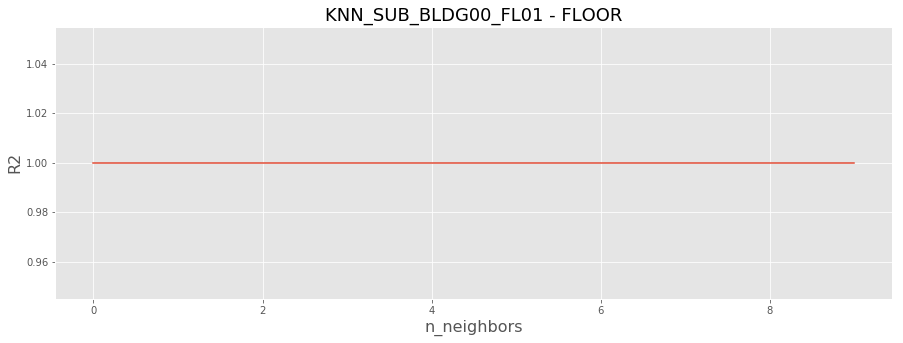

In [54]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_FL_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_FL_r2_val)
KNN_SUB_BLDG00_FL01_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_FL_R2.png', bbox_inches='tight')

plt.show()

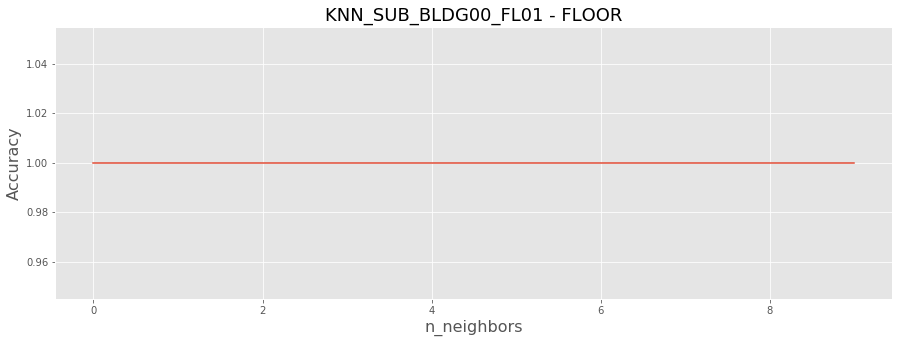

In [55]:
# plotting the accuracy values against k values
KNN_SUB_BLDG00_FL01_FL_curveAC = pd.DataFrame(KNN_SUB_BLDG00_FL01_FL_ac_val)
KNN_SUB_BLDG00_FL01_FL_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - FLOOR', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_FL_ACCURACY.png', bbox_inches='tight')

plt.show()

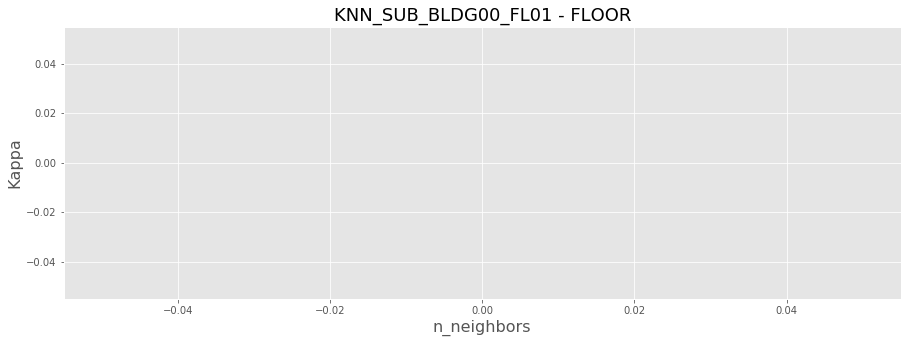

In [56]:
# plotting the kappa values against k values
KNN_SUB_BLDG00_FL01_FL_curveKA = pd.DataFrame(KNN_SUB_BLDG00_FL01_FL_ka_val)
KNN_SUB_BLDG00_FL01_FL_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - FLOOR', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_FL_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - BUILDINGID

In [57]:
KNN_SUB_BLDG00_FL01_BLDG_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG00_FL01_BLDG_r2_val = [] # to store r2 values for different k
KNN_SUB_BLDG00_FL01_BLDG_ac_val = [] # to store accuracy values for different k
KNN_SUB_BLDG00_FL01_BLDG_ka_val = [] # to store kappa values for different k

for KNN_SUB_BLDG00_FL01_BLDG in range(10):
    KNN_SUB_BLDG00_FL01_BLDG = KNN_SUB_BLDG00_FL01_BLDG + 1
    KNN_SUB_BLDG00_FL01_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_BLDG00_FL01_BLDG)
    
    KNN_SUB_BLDG00_FL01_BLDG_model.fit(X_KNN_SUB_BLDG00_FL01_BLDG_train, y_KNN_SUB_BLDG00_FL01_BLDG_train)  # fit the model
    KNN_SUB_BLDG00_FL01_BLDG_pred = KNN_SUB_BLDG00_FL01_BLDG_model.predict(X_KNN_SUB_BLDG00_FL01_BLDG_test) # make prediction
    
    KNN_SUB_BLDG00_FL01_BLDG_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_BLDG_test, KNN_SUB_BLDG00_FL01_BLDG_pred)
    KNN_SUB_BLDG00_FL01_BLDG_ac = accuracy_score(KNN_SUB_BLDG00_FL01_BLDG_pred, y_KNN_SUB_BLDG00_FL01_BLDG_test)
    KNN_SUB_BLDG00_FL01_BLDG_ka = cohen_kappa_score(y_KNN_SUB_BLDG00_FL01_BLDG_test, KNN_SUB_BLDG00_FL01_BLDG_pred)
    
    KNN_SUB_BLDG00_FL01_BLDG_r2_val.append(KNN_SUB_BLDG00_FL01_BLDG_r2) # store r2 values
    KNN_SUB_BLDG00_FL01_BLDG_ac_val.append(KNN_SUB_BLDG00_FL01_BLDG_ac) # store accuracy values
    KNN_SUB_BLDG00_FL01_BLDG_ka_val.append(KNN_SUB_BLDG00_FL01_BLDG_ka) # store kappa values
 
    print('Value (KNN_SUB_BLDG00_FL01_BLDG) for k=', KNN_SUB_BLDG00_FL01_BLDG, 'is:')    
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_BLDG_r2)
    print('Accuracy', KNN_SUB_BLDG00_FL01_BLDG_ac)
    print('Kappa', KNN_SUB_BLDG00_FL01_BLDG_ka)

print ()
KNN_SUB_BLDG00_FL01_BLDG_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG00_FL01_BLDG = neighbors.KNeighborsClassifier()
KNN_SUB_BLDG00_FL01_BLDG_model = GridSearchCV(KNN_SUB_BLDG00_FL01_BLDG, KNN_SUB_BLDG00_FL01_BLDG_params, cv=5)
KNN_SUB_BLDG00_FL01_BLDG_model.fit(X_KNN_SUB_BLDG00_FL01_BLDG_train, y_KNN_SUB_BLDG00_FL01_BLDG_train)
print ('BEST   :', KNN_SUB_BLDG00_FL01_BLDG_model.best_params_)

print ()
KNN_SUB_BLDG00_FL01_BLDG_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG00_FL01_BLDG_t = (KNN_SUB_BLDG00_FL01_BLDG_stop - KNN_SUB_BLDG00_FL01_BLDG_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG00_FL01_BLDG_t, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 7 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 8 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan
Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 9 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG00_FL01_BLDG) for k= 10 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan

BEST   : {'n_neighbors': 2}

Time in min:  0.045


In [58]:
KNN_SUB_BLDG00_FL01_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_BLDG00_FL01_BLDG_model.fit(X_KNN_SUB_BLDG00_FL01_BLDG_train, y_KNN_SUB_BLDG00_FL01_BLDG_train)  # fit the model
KNN_SUB_BLDG00_FL01_BLDG_pred = KNN_SUB_BLDG00_FL01_BLDG_model.predict(X_KNN_SUB_BLDG00_FL01_BLDG_test) # make prediction

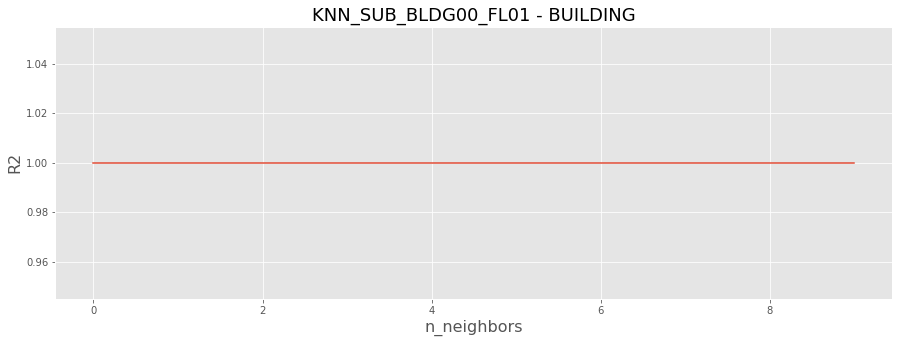

In [59]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_BLDG_r2_val)
KNN_SUB_BLDG00_FL01_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_BLDG_R2.png', bbox_inches='tight')

plt.show()

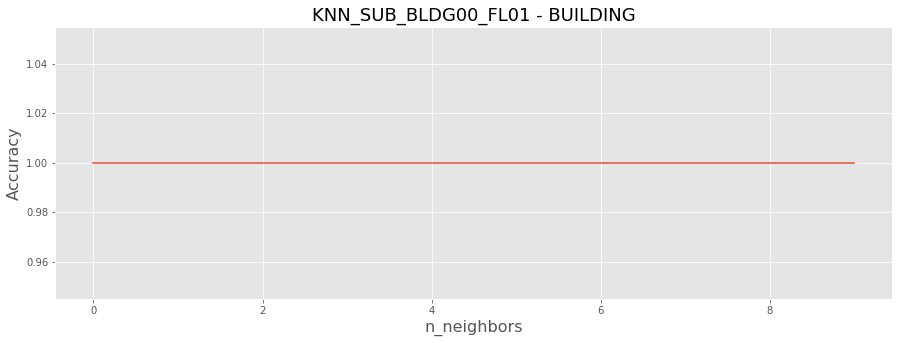

In [60]:
# plotting the accuracy values against k values
KNN_SUB_BLDG00_FL01_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_BLDG_r2_val)
KNN_SUB_BLDG00_FL01_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - BUILDING', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_BLDG_ACCURACY.png', bbox_inches='tight')

plt.show()

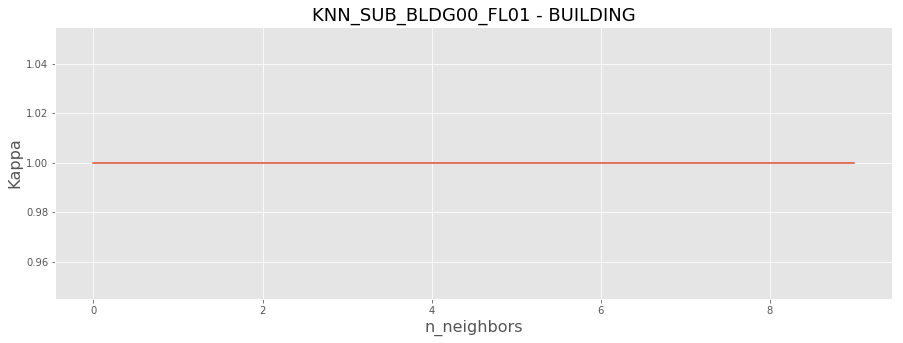

In [61]:
# plotting the kappa values against k values
KNN_SUB_BLDG00_FL01_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_BLDG_r2_val)
KNN_SUB_BLDG00_FL01_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - BUILDING', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_BLDG_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - ABSOLUTE_LONGITUDE

In [62]:
KNN_SUB_BLDG00_FL01_LON_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG00_FL01_LON_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG00_FL01_LON_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG00_FL01_LON in range(10):
    KNN_SUB_BLDG00_FL01_LON = KNN_SUB_BLDG00_FL01_LON + 1
    KNN_SUB_BLDG00_FL01_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG00_FL01_LON)

    KNN_SUB_BLDG00_FL01_LON_model.fit(X_KNN_SUB_BLDG00_FL01_LON_train, y_KNN_SUB_BLDG00_FL01_LON_train)  #fit the model
    KNN_SUB_BLDG00_FL01_LON_pred = KNN_SUB_BLDG00_FL01_LON_model.predict(X_KNN_SUB_BLDG00_FL01_LON_test) #make prediction
    
    KNN_SUB_BLDG00_FL01_LON_rmse = sqrt(mean_squared_error(y_KNN_SUB_BLDG00_FL01_LON_test, KNN_SUB_BLDG00_FL01_LON_pred))
    KNN_SUB_BLDG00_FL01_LON_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_LON_test, KNN_SUB_BLDG00_FL01_LON_pred)
    
    KNN_SUB_BLDG00_FL01_LON_rmse_val.append(KNN_SUB_BLDG00_FL01_LON_rmse) # store rmse values
    KNN_SUB_BLDG00_FL01_LON_r2_val.append(KNN_SUB_BLDG00_FL01_LON_r2) # store r2 values

    print('Value (LON) for k=', KNN_SUB_BLDG00_FL01_LON, 'is:')    
    print('RMSE   :', KNN_SUB_BLDG00_FL01_LON_rmse)
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_LON_r2)
    
print ()
KNN_SUB_BLDG00_FL01_LON_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG00_FL01_LON = neighbors.KNeighborsRegressor()
KNN_SUB_BLDG00_FL01_LON_model = GridSearchCV(KNN_SUB_BLDG00_FL01_LON, KNN_SUB_BLDG00_FL01_LON_params, cv=5)
KNN_SUB_BLDG00_FL01_LON_model.fit(X_KNN_SUB_BLDG00_FL01_LON_train, y_KNN_SUB_BLDG00_FL01_LON_train)
print ('BEST   :', KNN_SUB_BLDG00_FL01_LON_model.best_params_)

print ()
KNN_SUB_BLDG00_FL01_LON_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG00_FL01_LON_t = (KNN_SUB_BLDG00_FL01_LON_stop - KNN_SUB_BLDG00_FL01_LON_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG00_FL01_LON_t, 3))

Value (LON) for k= 1 is:
RMSE   : 3.081826232760412
Rsqaure: 0.9873711217997446
Value (LON) for k= 2 is:
RMSE   : 2.561877897350383
Rsqaure: 0.9912729928223192
Value (LON) for k= 3 is:
RMSE   : 2.3893502208091473
Rsqaure: 0.9924088407479129
Value (LON) for k= 4 is:
RMSE   : 2.4579622589722137
Rsqaure: 0.9919666091020543
Value (LON) for k= 5 is:
RMSE   : 2.5002416317741454
Rsqaure: 0.9916878677531269
Value (LON) for k= 6 is:
RMSE   : 2.585558718674326
Rsqaure: 0.9911109102770436
Value (LON) for k= 7 is:
RMSE   : 2.6468565756615825
Rsqaure: 0.9906844329206039
Value (LON) for k= 8 is:
RMSE   : 2.7281927280988514
Rsqaure: 0.9901031138691174
Value (LON) for k= 9 is:
RMSE   : 2.85990495590881
Rsqaure: 0.9891244387117136
Value (LON) for k= 10 is:
RMSE   : 2.994674036324493
Rsqaure: 0.9880752963706085

BEST   : {'n_neighbors': 2}

Time in min:  0.046


In [63]:
KNN_SUB_BLDG00_FL01_LON_model = neighbors.KNeighborsRegressor(n_neighbors = 2)

KNN_SUB_BLDG00_FL01_LON_model.fit(X_KNN_SUB_BLDG00_FL01_LON_train, y_KNN_SUB_BLDG00_FL01_LON_train)  # fit the model
KNN_SUB_BLDG00_FL01_LON_pred = KNN_SUB_BLDG00_FL01_LON_model.predict(X_KNN_SUB_BLDG00_FL01_LON_test) # make prediction

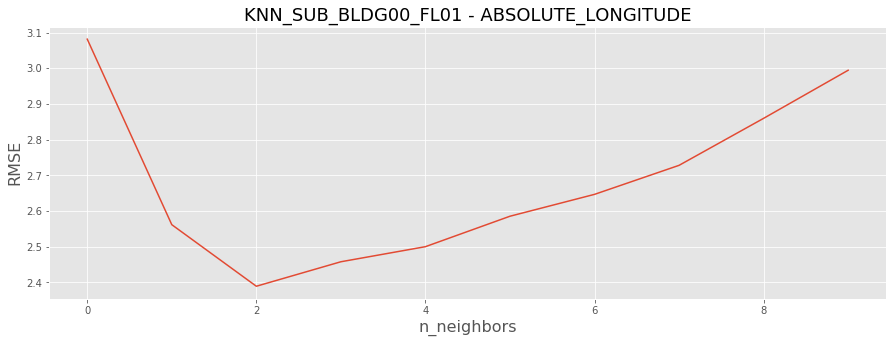

In [64]:
# plotting the rmse values against k values
KNN_SUB_BLDG00_FL01_LON_curveRMSE = pd.DataFrame(KNN_SUB_BLDG00_FL01_LON_rmse_val)
KNN_SUB_BLDG00_FL01_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_LON_RMSE.png', bbox_inches='tight')

plt.show()

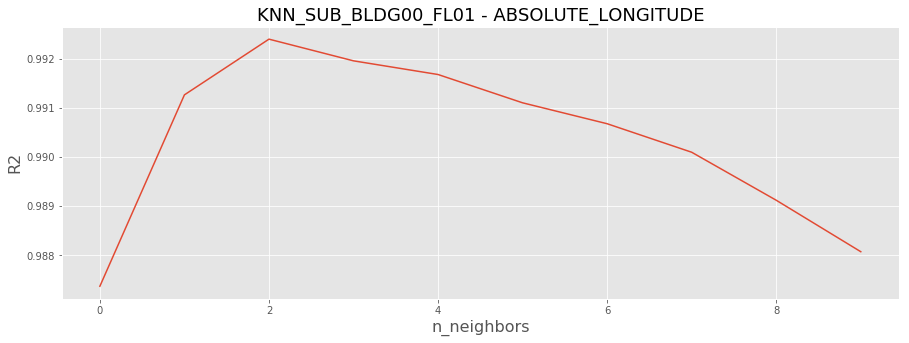

In [65]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_LON_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_LON_r2_val)
KNN_SUB_BLDG00_FL01_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_LON_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG00_FL01 - ABSOLUTE_LATITUDE

In [66]:
KNN_SUB_BLDG00_FL01_LAT_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG00_FL01_LAT_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG00_FL01_LAT_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG00_FL01_LAT in range(10):
    KNN_SUB_BLDG00_FL01_LAT = KNN_SUB_BLDG00_FL01_LAT + 1
    KNN_SUB_BLDG00_FL01_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG00_FL01_LAT)

    KNN_SUB_BLDG00_FL01_LAT_model.fit(X_KNN_SUB_BLDG00_FL01_LAT_train, y_KNN_SUB_BLDG00_FL01_LAT_train)  #fit the model
    KNN_SUB_BLDG00_FL01_LAT_pred = KNN_SUB_BLDG00_FL01_LAT_model.predict(X_KNN_SUB_BLDG00_FL01_LAT_test) #make prediction
    
    KNN_SUB_BLDG00_FL01_LAT_rmse = sqrt(mean_squared_error(y_KNN_SUB_BLDG00_FL01_LAT_test, KNN_SUB_BLDG00_FL01_LAT_pred))
    KNN_SUB_BLDG00_FL01_LAT_r2 = r2_score(y_KNN_SUB_BLDG00_FL01_LAT_test, KNN_SUB_BLDG00_FL01_LAT_pred)
    
    KNN_SUB_BLDG00_FL01_LAT_rmse_val.append(KNN_SUB_BLDG00_FL01_LAT_rmse) # store rmse values
    KNN_SUB_BLDG00_FL01_LAT_r2_val.append(KNN_SUB_BLDG00_FL01_LAT_r2) # store r2 values

    print('Value (LAT) for k=', KNN_SUB_BLDG00_FL01_LAT, 'is:')    
    print('RMSE   :', KNN_SUB_BLDG00_FL01_LAT_rmse)
    print('Rsqaure:', KNN_SUB_BLDG00_FL01_LAT_r2)
    
print ()
KNN_SUB_BLDG00_FL01_LAT_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG00_FL01_LAT = neighbors.KNeighborsRegressor()
KNN_SUB_BLDG00_FL01_LAT_model = GridSearchCV(KNN_SUB_BLDG00_FL01_LAT, KNN_SUB_BLDG00_FL01_LAT_params, cv=5)
KNN_SUB_BLDG00_FL01_LAT_model.fit(X_KNN_SUB_BLDG00_FL01_LAT_train, y_KNN_SUB_BLDG00_FL01_LAT_train)
print ('BEST   :', KNN_SUB_BLDG00_FL01_LAT_model.best_params_)

print ()
KNN_SUB_BLDG00_FL01_LAT_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG00_FL01_LAT_t = (KNN_SUB_BLDG00_FL01_LAT_stop - KNN_SUB_BLDG00_FL01_LAT_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG00_FL01_LAT_t, 3))

Value (LAT) for k= 1 is:
RMSE   : 2.293825778818098
Rsqaure: 0.9948321368046474
Value (LAT) for k= 2 is:
RMSE   : 2.2414438170233715
Rsqaure: 0.9950654691884706
Value (LAT) for k= 3 is:
RMSE   : 2.1910252403566584
Rsqaure: 0.9952849651043421
Value (LAT) for k= 4 is:
RMSE   : 2.2965542126169423
Rsqaure: 0.9948198354706955
Value (LAT) for k= 5 is:
RMSE   : 2.346756601317022
Rsqaure: 0.9945908846063332
Value (LAT) for k= 6 is:
RMSE   : 2.4350273424909035
Rsqaure: 0.9941763155598516
Value (LAT) for k= 7 is:
RMSE   : 2.48478033071523
Rsqaure: 0.9939359028378362
Value (LAT) for k= 8 is:
RMSE   : 2.5119355035693354
Rsqaure: 0.993802634379663
Value (LAT) for k= 9 is:
RMSE   : 2.6317551985785257
Rsqaure: 0.993197302974973
Value (LAT) for k= 10 is:
RMSE   : 2.752102220182848
Rsqaure: 0.9925609192760312

BEST   : {'n_neighbors': 2}

Time in min:  0.044


In [67]:
KNN_SUB_BLDG00_FL01_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = 2)

KNN_SUB_BLDG00_FL01_LAT_model.fit(X_KNN_SUB_BLDG00_FL01_LAT_train, y_KNN_SUB_BLDG00_FL01_LAT_train)  # fit the model
KNN_SUB_BLDG00_FL01_LAT_pred = KNN_SUB_BLDG00_FL01_LAT_model.predict(X_KNN_SUB_BLDG00_FL01_LAT_test) # make prediction

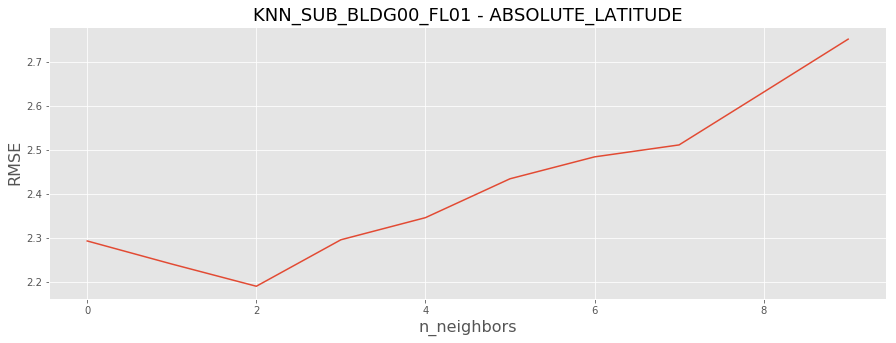

In [68]:
# plotting the rmse values against k values
KNN_SUB_BLDG00_FL01_LAT_curveRMSE = pd.DataFrame(KNN_SUB_BLDG00_FL01_LAT_rmse_val)
KNN_SUB_BLDG00_FL01_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_LAT_RMSE.png', bbox_inches='tight')

plt.show()

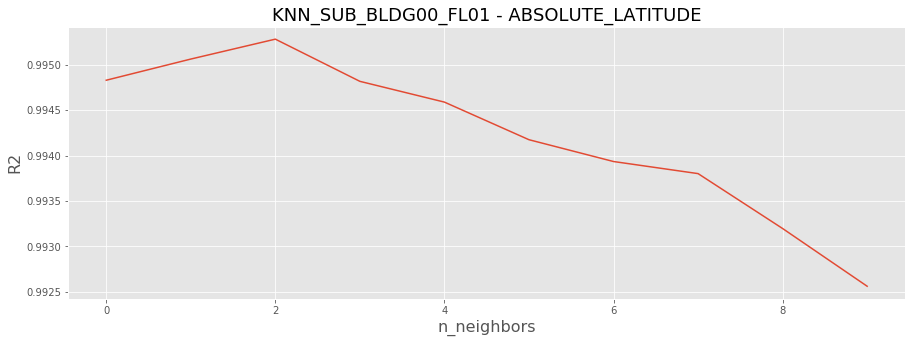

In [69]:
# plotting the r2 values against k values
KNN_SUB_BLDG00_FL01_LAT_curveR2 = pd.DataFrame(KNN_SUB_BLDG00_FL01_LAT_r2_val)
KNN_SUB_BLDG00_FL01_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG00_FL01 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_LAT_r2.png', bbox_inches='tight')

plt.show()

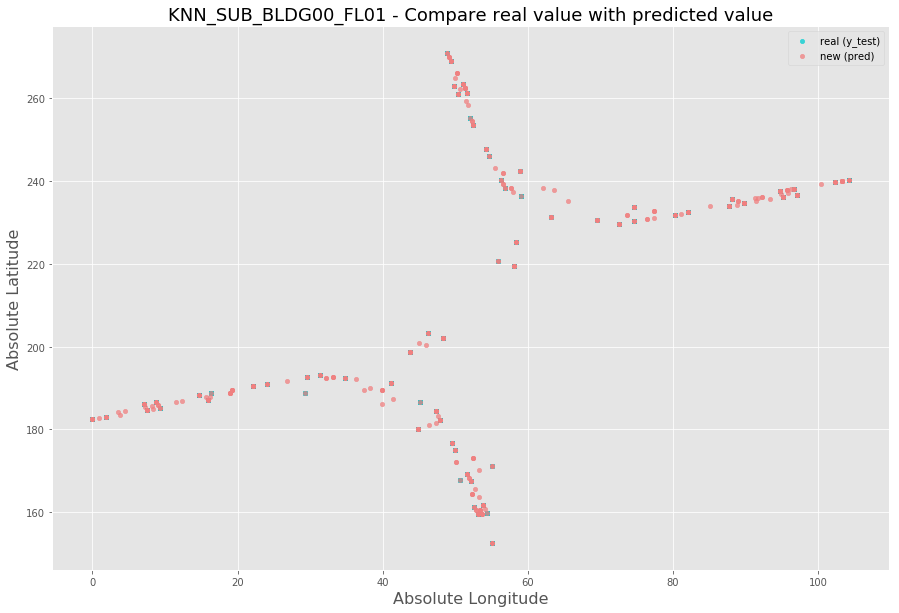

In [70]:
REAL_SUB_BLDG00_FL01 = pd.DataFrame()
REAL_SUB_BLDG00_FL01['ABSOLUTE_LONGITUDE'] = y_KNN_SUB_BLDG00_FL01_LON
REAL_SUB_BLDG00_FL01['ABSOLUTE_LATITUDE'] = y_KNN_SUB_BLDG00_FL01_LAT
ax1 = REAL_SUB_BLDG00_FL01.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'real (y_test)',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)

NEW_SUB_BLDG00_FL01 = pd.DataFrame()
NEW_SUB_BLDG00_FL01['ABSOLUTE_LONGITUDE'] = KNN_SUB_BLDG00_FL01_LON_pred
NEW_SUB_BLDG00_FL01['ABSOLUTE_LATITUDE'] = KNN_SUB_BLDG00_FL01_LAT_pred
ax2 = NEW_SUB_BLDG00_FL01.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                   label = 'new (pred)',
                   color="lightcoral",
                   figsize=(15,10),
                   alpha=0.75,
                   ax=ax1)

plt.title("KNN_SUB_BLDG00_FL01 - Compare real value with predicted value", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/03_KNN_SUB_BLDG00_FL01_REAL_NEW.png', bbox_inches='tight')

plt.show()

### KNN_SUB - BLDG02_FL03 <a id='KNN_SUB_BLDG02_FL03'></a>

#### KNN_SUB - BLDG02_FL03 - SPLITTING

In [71]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_SUB_BLDG02_FL03_FL = BLDG02_FL03_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG02_FL03_FL = BLDG02_FL03_df_train.iloc[:, 384].values

X_KNN_SUB_BLDG02_FL03_BLDG = BLDG02_FL03_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG02_FL03_BLDG = BLDG02_FL03_df_train.iloc[:, 385].values

X_KNN_SUB_BLDG02_FL03_LON = BLDG02_FL03_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG02_FL03_LON = BLDG02_FL03_df_train.iloc[:, 386].values

X_KNN_SUB_BLDG02_FL03_LAT = BLDG02_FL03_df_train.iloc[:, :-4].values
y_KNN_SUB_BLDG02_FL03_LAT = BLDG02_FL03_df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_SUB_BLDG02_FL03_FL_train, X_KNN_SUB_BLDG02_FL03_FL_test, y_KNN_SUB_BLDG02_FL03_FL_train, y_KNN_SUB_BLDG02_FL03_FL_test = train_test_split(X_KNN_SUB_BLDG02_FL03_FL, y_KNN_SUB_BLDG02_FL03_FL, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG02_FL03_BLDG_train, X_KNN_SUB_BLDG02_FL03_BLDG_test, y_KNN_SUB_BLDG02_FL03_BLDG_train, y_KNN_SUB_BLDG02_FL03_BLDG_test = train_test_split(X_KNN_SUB_BLDG02_FL03_BLDG, y_KNN_SUB_BLDG02_FL03_BLDG, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG02_FL03_LON_train, X_KNN_SUB_BLDG02_FL03_LON_test, y_KNN_SUB_BLDG02_FL03_LON_train, y_KNN_SUB_BLDG02_FL03_LON_test = train_test_split(X_KNN_SUB_BLDG02_FL03_LON, y_KNN_SUB_BLDG02_FL03_LON, test_size=0.3, random_state=0)
X_KNN_SUB_BLDG02_FL03_LAT_train, X_KNN_SUB_BLDG02_FL03_LAT_test, y_KNN_SUB_BLDG02_FL03_LAT_train, y_KNN_SUB_BLDG02_FL03_LAT_test = train_test_split(X_KNN_SUB_BLDG02_FL03_LAT, y_KNN_SUB_BLDG02_FL03_LAT, test_size=0.3, random_state=0)

#### KNN_SUB - BLDG02_FL03 - FLOOR

In [72]:
KNN_SUB_BLDG02_FL03_FL_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG02_FL03_FL_r2_val = [] # to store r2 values for different k
KNN_SUB_BLDG02_FL03_FL_ac_val = [] # to store accuracy values for different k
KNN_SUB_BLDG02_FL03_FL_ka_val = [] # to store kappa values for different k

for KNN_SUB_BLDG02_FL03_FL in range(10):
    KNN_SUB_BLDG02_FL03_FL = KNN_SUB_BLDG02_FL03_FL + 1
    KNN_SUB_BLDG02_FL03_FL_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_BLDG02_FL03_FL)
    
    KNN_SUB_BLDG02_FL03_FL_model.fit(X_KNN_SUB_BLDG02_FL03_FL_train, y_KNN_SUB_BLDG02_FL03_FL_train)  # fit the model
    KNN_SUB_BLDG02_FL03_FL_pred = KNN_SUB_BLDG02_FL03_FL_model.predict(X_KNN_SUB_BLDG02_FL03_FL_test) # make prediction
    
    KNN_SUB_BLDG02_FL03_FL_r2 = r2_score(y_KNN_SUB_BLDG02_FL03_FL_test, KNN_SUB_BLDG02_FL03_FL_pred)
    KNN_SUB_BLDG02_FL03_FL_ac = accuracy_score(KNN_SUB_BLDG02_FL03_FL_pred, y_KNN_SUB_BLDG02_FL03_FL_test)
    KNN_SUB_BLDG02_FL03_FL_ka = cohen_kappa_score(y_KNN_SUB_BLDG02_FL03_FL_test, KNN_SUB_BLDG02_FL03_FL_pred)
    
    KNN_SUB_BLDG02_FL03_FL_r2_val.append(KNN_SUB_BLDG02_FL03_FL_r2) # store r2 values
    KNN_SUB_BLDG02_FL03_FL_ac_val.append(KNN_SUB_BLDG02_FL03_FL_ac) # store accuracy values
    KNN_SUB_BLDG02_FL03_FL_ka_val.append(KNN_SUB_BLDG02_FL03_FL_ka) # store kappa values
 
    print('Value (KNN_SUB_BLDG02_FL03_FL) for k=', KNN_SUB_BLDG02_FL03_FL, 'is:')    
    print('Rsqaure:', KNN_SUB_BLDG02_FL03_FL_r2)
    print('Accuracy', KNN_SUB_BLDG02_FL03_FL_ac)
    print('Kappa', KNN_SUB_BLDG02_FL03_FL_ka)

print ()
KNN_SUB_BLDG02_FL03_FL_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG02_FL03_FL = neighbors.KNeighborsClassifier()
KNN_SUB_BLDG02_FL03_FL_model = GridSearchCV(KNN_SUB_BLDG02_FL03_FL, KNN_SUB_BLDG02_FL03_FL_params, cv=5)
KNN_SUB_BLDG02_FL03_FL_model.fit(X_KNN_SUB_BLDG02_FL03_FL_train, y_KNN_SUB_BLDG02_FL03_FL_train)
print ('BEST   :', KNN_SUB_BLDG02_FL03_FL_model.best_params_)

print ()
KNN_SUB_BLDG02_FL03_FL_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG02_FL03_FL_t = (KNN_SUB_BLDG02_FL03_FL_stop - KNN_SUB_BLDG02_FL03_FL_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG02_FL03_FL_t, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 7 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 8 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 9 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_FL) for k= 10 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan

BEST   : {'n_neighbors': 2}

Time in min:  0.223


In [73]:
KNN_SUB_BLDG02_FL03_FL_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_BLDG02_FL03_FL_model.fit(X_KNN_SUB_BLDG02_FL03_FL_train, y_KNN_SUB_BLDG02_FL03_FL_train)  # fit the model
KNN_SUB_BLDG02_FL03_FL_pred = KNN_SUB_BLDG02_FL03_FL_model.predict(X_KNN_SUB_BLDG02_FL03_FL_test) # make prediction

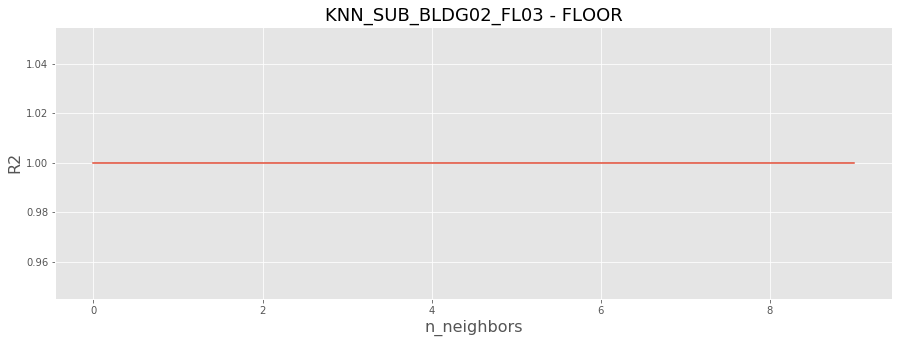

In [74]:
# plotting the r2 values against k values
KNN_SUB_BLDG02_FL03_FL_curveR2 = pd.DataFrame(KNN_SUB_BLDG02_FL03_FL_r2_val)
KNN_SUB_BLDG02_FL03_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_FL_R2.png', bbox_inches='tight')

plt.show()

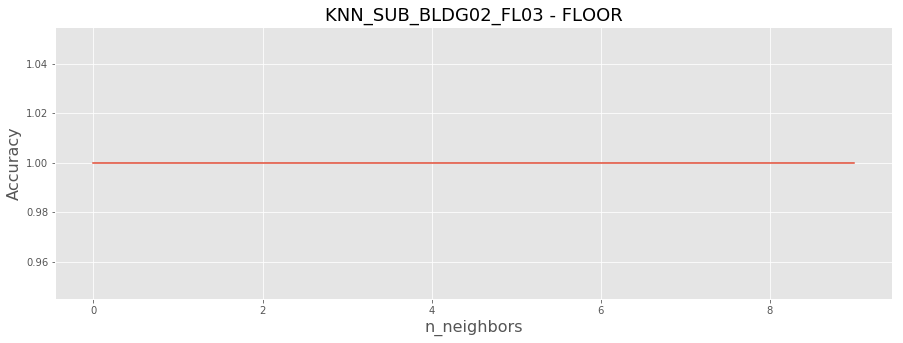

In [75]:
# plotting the accuracy values against k values
KNN_SUB_BLDG02_FL03_FL_curveAC = pd.DataFrame(KNN_SUB_BLDG02_FL03_FL_ac_val)
KNN_SUB_BLDG02_FL03_FL_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - FLOOR', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_FL_ACCURACY.png', bbox_inches='tight')

plt.show()

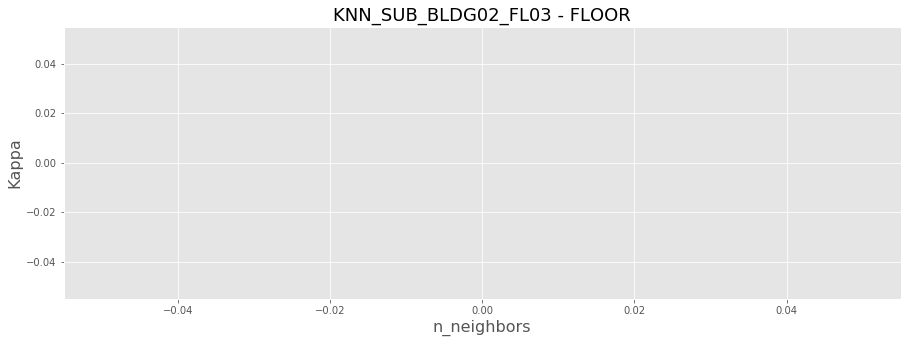

In [76]:
# plotting the kappa values against k values
KNN_SUB_BLDG02_FL03_FL_curveKA = pd.DataFrame(KNN_SUB_BLDG02_FL03_FL_ka_val)
KNN_SUB_BLDG02_FL03_FL_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - FLOOR', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_FL_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG02_FL03 - BUILDINGID

In [77]:
KNN_SUB_BLDG02_FL03_BLDG_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG02_FL03_BLDG_r2_val = [] # to store r2 values for different k
KNN_SUB_BLDG02_FL03_BLDG_ac_val = [] # to store accuracy values for different k
KNN_SUB_BLDG02_FL03_BLDG_ka_val = [] # to store kappa values for different k

for KNN_SUB_BLDG02_FL03_BLDG in range(10):
    KNN_SUB_BLDG02_FL03_BLDG = KNN_SUB_BLDG02_FL03_BLDG + 1
    KNN_SUB_BLDG02_FL03_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_BLDG02_FL03_BLDG)
    
    KNN_SUB_BLDG02_FL03_BLDG_model.fit(X_KNN_SUB_BLDG02_FL03_BLDG_train, y_KNN_SUB_BLDG02_FL03_BLDG_train)  # fit the model
    KNN_SUB_BLDG02_FL03_BLDG_pred = KNN_SUB_BLDG02_FL03_BLDG_model.predict(X_KNN_SUB_BLDG02_FL03_BLDG_test) # make prediction
    
    KNN_SUB_BLDG02_FL03_BLDG_r2 = r2_score(y_KNN_SUB_BLDG02_FL03_BLDG_test, KNN_SUB_BLDG02_FL03_BLDG_pred)
    KNN_SUB_BLDG02_FL03_BLDG_ac = accuracy_score(KNN_SUB_BLDG02_FL03_BLDG_pred, y_KNN_SUB_BLDG02_FL03_BLDG_test)
    KNN_SUB_BLDG02_FL03_BLDG_ka = cohen_kappa_score(y_KNN_SUB_BLDG02_FL03_BLDG_test, KNN_SUB_BLDG02_FL03_BLDG_pred)
    
    KNN_SUB_BLDG02_FL03_BLDG_r2_val.append(KNN_SUB_BLDG02_FL03_BLDG_r2) # store r2 values
    KNN_SUB_BLDG02_FL03_BLDG_ac_val.append(KNN_SUB_BLDG02_FL03_BLDG_ac) # store accuracy values
    KNN_SUB_BLDG02_FL03_BLDG_ka_val.append(KNN_SUB_BLDG02_FL03_BLDG_ka) # store kappa values
 
    print('Value (KNN_SUB_BLDG02_FL03_BLDG) for k=', KNN_SUB_BLDG02_FL03_BLDG, 'is:')    
    print('Rsqaure:', KNN_SUB_BLDG02_FL03_BLDG_r2)
    print('Accuracy', KNN_SUB_BLDG02_FL03_BLDG_ac)
    print('Kappa', KNN_SUB_BLDG02_FL03_BLDG_ka)

print ()
KNN_SUB_BLDG02_FL03_BLDG_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG02_FL03_BLDG = neighbors.KNeighborsClassifier()
KNN_SUB_BLDG02_FL03_BLDG_model = GridSearchCV(KNN_SUB_BLDG02_FL03_BLDG, KNN_SUB_BLDG02_FL03_BLDG_params, cv=5)
KNN_SUB_BLDG02_FL03_BLDG_model.fit(X_KNN_SUB_BLDG02_FL03_BLDG_train, y_KNN_SUB_BLDG02_FL03_BLDG_train)
print ('BEST   :', KNN_SUB_BLDG02_FL03_BLDG_model.best_params_)

print ()
KNN_SUB_BLDG02_FL03_BLDG_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG02_FL03_BLDG_t = (KNN_SUB_BLDG02_FL03_BLDG_stop - KNN_SUB_BLDG02_FL03_BLDG_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG02_FL03_BLDG_t, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 7 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 8 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 9 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_BLDG02_FL03_BLDG) for k= 10 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan

BEST   : {'n_neighbors': 2}

Time in min:  0.225


In [78]:
KNN_SUB_BLDG02_FL03_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_BLDG02_FL03_BLDG_model.fit(X_KNN_SUB_BLDG02_FL03_BLDG_train, y_KNN_SUB_BLDG02_FL03_BLDG_train)  # fit the model
KNN_SUB_BLDG02_FL03_BLDG_pred = KNN_SUB_BLDG02_FL03_BLDG_model.predict(X_KNN_SUB_BLDG02_FL03_BLDG_test) # make prediction

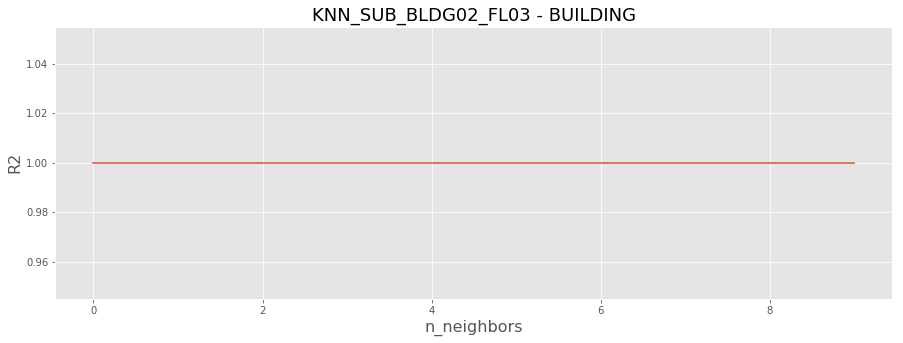

In [79]:
# plotting the r2 values against k values
KNN_SUB_BLDG02_FL03_BLDG_curveR2 = pd.DataFrame(KNN_SUB_BLDG02_FL03_BLDG_r2_val)
KNN_SUB_BLDG02_FL03_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_BLDG_R2.png', bbox_inches='tight')

plt.show()

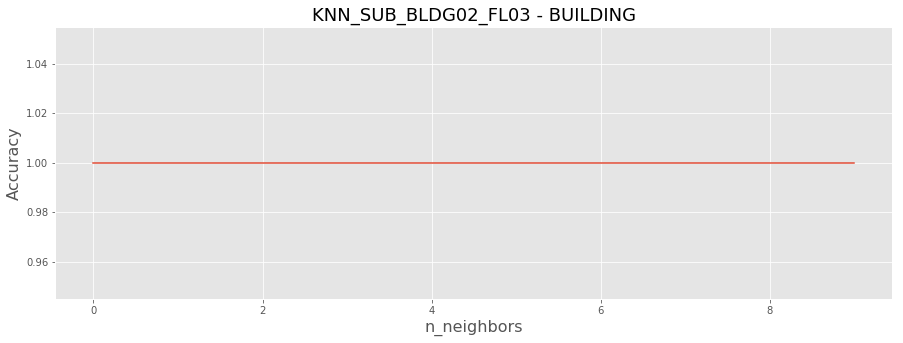

In [80]:
# plotting the accuracy values against k values
KNN_SUB_BLDG02_FL03_BLDG_curveAC = pd.DataFrame(KNN_SUB_BLDG02_FL03_BLDG_ac_val)
KNN_SUB_BLDG02_FL03_BLDG_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - BUILDING', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_BLDG_ACCURACY.png', bbox_inches='tight')

plt.show()

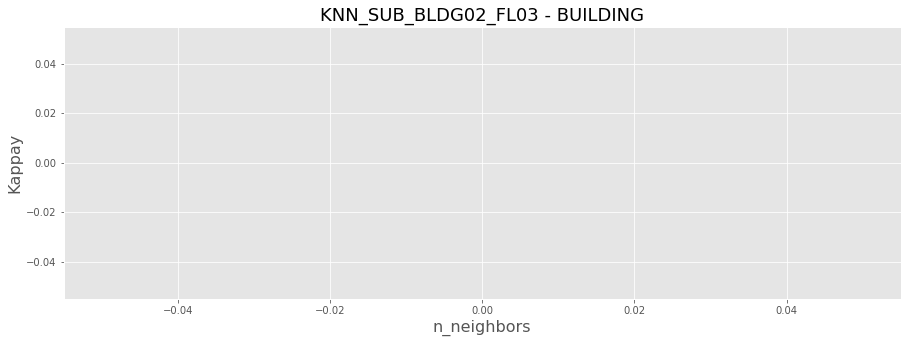

In [81]:
# plotting the kappa values against k values
KNN_SUB_BLDG02_FL03_BLDG_curveKA = pd.DataFrame(KNN_SUB_BLDG02_FL03_BLDG_ka_val)
KNN_SUB_BLDG02_FL03_BLDG_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - BUILDING', fontsize=18)
plt.ylabel('Kappay', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_BLDG_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG02_FL03 - ABSOLUTE_LONGITUDE

In [82]:
KNN_SUB_BLDG02_FL03_LON_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG02_FL03_LON_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG02_FL03_LON_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG02_FL03_LON in range(10):
    KNN_SUB_BLDG02_FL03_LON = KNN_SUB_BLDG02_FL03_LON + 1
    KNN_SUB_BLDG02_FL03_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG02_FL03_LON)

    KNN_SUB_BLDG02_FL03_LON_model.fit(X_KNN_SUB_BLDG02_FL03_LON_train, y_KNN_SUB_BLDG02_FL03_LON_train)  # fit the model
    KNN_SUB_BLDG02_FL03_LON_pred = KNN_SUB_BLDG02_FL03_LON_model.predict(X_KNN_SUB_BLDG02_FL03_LON_test) # make prediction
    
    KNN_SUB_BLDG02_FL03_LON_rmse = sqrt(mean_squared_error(y_KNN_SUB_BLDG02_FL03_LON_test, KNN_SUB_BLDG02_FL03_LON_pred))
    KNN_SUB_BLDG02_FL03_LON_r2 = r2_score(y_KNN_SUB_BLDG02_FL03_LON_test, KNN_SUB_BLDG02_FL03_LON_pred)
    
    KNN_SUB_BLDG02_FL03_LON_rmse_val.append(KNN_SUB_BLDG02_FL03_LON_rmse) # store rmse values
    KNN_SUB_BLDG02_FL03_LON_r2_val.append(KNN_SUB_BLDG02_FL03_LON_r2) # store r2 values

    print('Value (LON) for k=', KNN_SUB_BLDG02_FL03_LON, 'is:')    
    print('RMSE   :', KNN_SUB_BLDG02_FL03_LON_rmse)
    print('Rsqaure:', KNN_SUB_BLDG02_FL03_LON_r2)
    
print ()
KNN_SUB_BLDG02_FL03_LON_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG02_FL03_LON = neighbors.KNeighborsRegressor()
KNN_SUB_BLDG02_FL03_LON_model = GridSearchCV(KNN_SUB_BLDG02_FL03_LON, KNN_SUB_BLDG02_FL03_LON_params, cv=5)
KNN_SUB_BLDG02_FL03_LON_model.fit(X_KNN_SUB_BLDG02_FL03_LON_train, y_KNN_SUB_BLDG02_FL03_LON_train)
print ('BEST   :', KNN_SUB_BLDG02_FL03_LON_model.best_params_)

print ()
KNN_SUB_BLDG02_FL03_LON_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG02_FL03_LON_t = (KNN_SUB_BLDG02_FL03_LON_stop - KNN_SUB_BLDG02_FL03_LON_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG02_FL03_LON_t, 3))

Value (LON) for k= 1 is:
RMSE   : 2.767420950985255
Rsqaure: 0.9905741756700183
Value (LON) for k= 2 is:
RMSE   : 2.483568663704635
Rsqaure: 0.9924086111858652
Value (LON) for k= 3 is:
RMSE   : 2.502547259623786
Rsqaure: 0.9922921462094673
Value (LON) for k= 4 is:
RMSE   : 2.531515119426555
Rsqaure: 0.9921126712370534
Value (LON) for k= 5 is:
RMSE   : 2.6197598903348536
Rsqaure: 0.99155320664124
Value (LON) for k= 6 is:
RMSE   : 2.6223658756892902
Rsqaure: 0.9915363935217579
Value (LON) for k= 7 is:
RMSE   : 2.751950624542177
Rsqaure: 0.9906792648499848
Value (LON) for k= 8 is:
RMSE   : 2.8564019668735297
Rsqaure: 0.989958293133827
Value (LON) for k= 9 is:
RMSE   : 2.965627991632428
Rsqaure: 0.9891756397696361
Value (LON) for k= 10 is:
RMSE   : 3.090239250016778
Rsqaure: 0.9882468818711309

BEST   : {'n_neighbors': 4}

Time in min:  0.226


In [83]:
KNN_SUB_BLDG02_FL03_LON_model = neighbors.KNeighborsRegressor(n_neighbors = 2)

KNN_SUB_BLDG02_FL03_LON_model.fit(X_KNN_SUB_BLDG02_FL03_LON_train, y_KNN_SUB_BLDG02_FL03_LON_train)  # fit the model
KNN_SUB_BLDG02_FL03_LON_pred = KNN_SUB_BLDG02_FL03_LON_model.predict(X_KNN_SUB_BLDG02_FL03_LON_test) # make prediction 

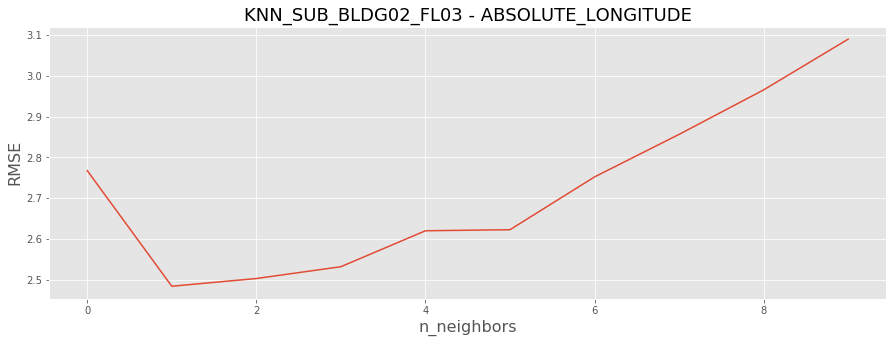

In [84]:
# plotting the rmse values against k values
KNN_SUB_BLDG02_FL03_LON_curveRMSE = pd.DataFrame(KNN_SUB_BLDG02_FL03_LON_rmse_val)
KNN_SUB_BLDG02_FL03_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_LON_RMSE.png', bbox_inches='tight')

plt.show()

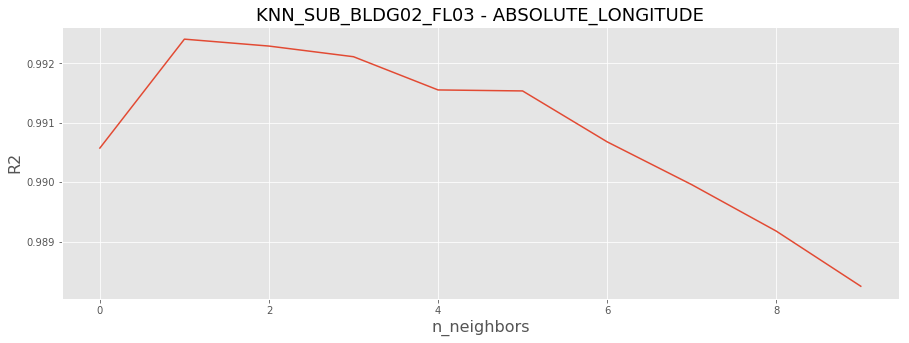

In [85]:
# plotting the r2 values against k values
KNN_SUB_BLDG02_FL03_LON_curveR2 = pd.DataFrame(KNN_SUB_BLDG02_FL03_LON_r2_val)
KNN_SUB_BLDG02_FL03_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_LON_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - BLDG02_FL03 - ABSOLUTE_LATITUDE

In [86]:
KNN_SUB_BLDG02_FL03_LAT_start = timeit.default_timer() # start computing time

KNN_SUB_BLDG02_FL03_LAT_rmse_val = [] # to store rmse values for different k
KNN_SUB_BLDG02_FL03_LAT_r2_val = [] # to store r2 values for different k

for KNN_SUB_BLDG02_FL03_LAT in range(10):
    KNN_SUB_BLDG02_FL03_LAT = KNN_SUB_BLDG02_FL03_LAT + 1
    KNN_SUB_BLDG02_FL03_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_BLDG02_FL03_LAT)

    KNN_SUB_BLDG02_FL03_LAT_model.fit(X_KNN_SUB_BLDG02_FL03_LAT_train, y_KNN_SUB_BLDG02_FL03_LAT_train)  # fit the model
    KNN_SUB_BLDG02_FL03_LAT_pred = KNN_SUB_BLDG02_FL03_LAT_model.predict(X_KNN_SUB_BLDG02_FL03_LAT_test) # make prediction
    
    KNN_SUB_BLDG02_FL03_LAT_rmse = sqrt(mean_squared_error(y_KNN_SUB_BLDG02_FL03_LAT_test, KNN_SUB_BLDG02_FL03_LAT_pred))
    KNN_SUB_BLDG02_FL03_LAT_r2 = r2_score(y_KNN_SUB_BLDG02_FL03_LAT_test, KNN_SUB_BLDG02_FL03_LAT_pred)
    
    KNN_SUB_BLDG02_FL03_LAT_rmse_val.append(KNN_SUB_BLDG02_FL03_LAT_rmse) # store rmse values
    KNN_SUB_BLDG02_FL03_LAT_r2_val.append(KNN_SUB_BLDG02_FL03_LAT_r2) # store r2 values

    print('Value (LAT) for k=', KNN_SUB_BLDG02_FL03_LAT, 'is:')    
    print('RMSE   :', KNN_SUB_BLDG02_FL03_LAT_rmse)
    print('Rsqaure:', KNN_SUB_BLDG02_FL03_LAT_r2)
    
print ()
KNN_SUB_BLDG02_FL03_LAT_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_BLDG02_FL03_LAT = neighbors.KNeighborsRegressor()
KNN_SUB_BLDG02_FL03_LAT_model = GridSearchCV(KNN_SUB_BLDG02_FL03_LAT, KNN_SUB_BLDG02_FL03_LAT_params, cv=5)
KNN_SUB_BLDG02_FL03_LAT_model.fit(X_KNN_SUB_BLDG02_FL03_LAT_train, y_KNN_SUB_BLDG02_FL03_LAT_train)
print ('BEST   :', KNN_SUB_BLDG02_FL03_LAT_model.best_params_)

print ()
KNN_SUB_BLDG02_FL03_LAT_stop = timeit.default_timer() # stop computing time
KNN_SUB_BLDG02_FL03_LAT_t = (KNN_SUB_BLDG02_FL03_LAT_stop - KNN_SUB_BLDG02_FL03_LAT_start)/60
print ('Time in min: ', round(KNN_SUB_BLDG02_FL03_LAT_t, 3))

Value (LAT) for k= 1 is:
RMSE   : 2.329827188141694
Rsqaure: 0.9949620470388358
Value (LAT) for k= 2 is:
RMSE   : 2.315223043673484
Rsqaure: 0.9950250082719931
Value (LAT) for k= 3 is:
RMSE   : 2.195332528464377
Rsqaure: 0.9955269133095068
Value (LAT) for k= 4 is:
RMSE   : 2.2115348790242577
Rsqaure: 0.9954606436562109
Value (LAT) for k= 5 is:
RMSE   : 2.2756741482172105
Rsqaure: 0.9951935232920194
Value (LAT) for k= 6 is:
RMSE   : 2.295621887824045
Rsqaure: 0.9951088902935836
Value (LAT) for k= 7 is:
RMSE   : 2.3683510019247915
Rsqaure: 0.9947940639937639
Value (LAT) for k= 8 is:
RMSE   : 2.4692204586316167
Rsqaure: 0.9943411729155087
Value (LAT) for k= 9 is:
RMSE   : 2.5313630732762924
Rsqaure: 0.9940527585429859
Value (LAT) for k= 10 is:
RMSE   : 2.6042037462354464
Rsqaure: 0.9937055670911119

BEST   : {'n_neighbors': 4}

Time in min:  0.223


In [87]:
KNN_SUB_BLDG02_FL03_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = 4)

KNN_SUB_BLDG02_FL03_LAT_model.fit(X_KNN_SUB_BLDG02_FL03_LAT_train, y_KNN_SUB_BLDG02_FL03_LAT_train)  # fit the model
KNN_SUB_BLDG02_FL03_LAT_pred = KNN_SUB_BLDG02_FL03_LAT_model.predict(X_KNN_SUB_BLDG02_FL03_LAT_test) # make prediction

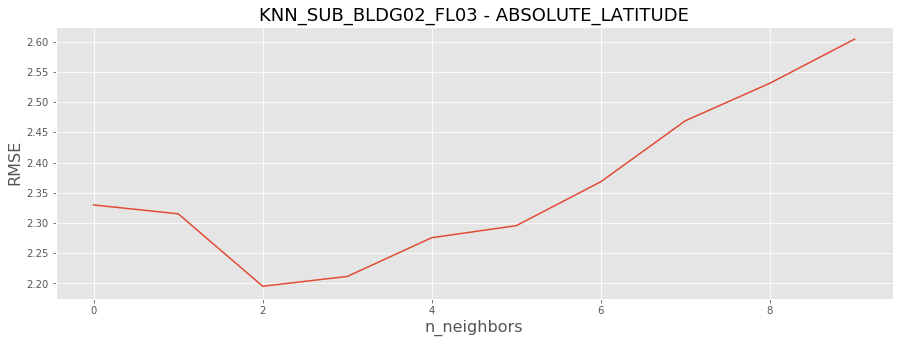

In [88]:
# plotting the rmse values against k values
KNN_SUB_BLDG02_FL03_LAT_curveRMSE = pd.DataFrame(KNN_SUB_BLDG02_FL03_LAT_rmse_val)
KNN_SUB_BLDG02_FL03_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_LAT_RMSE.png', bbox_inches='tight')

plt.show()

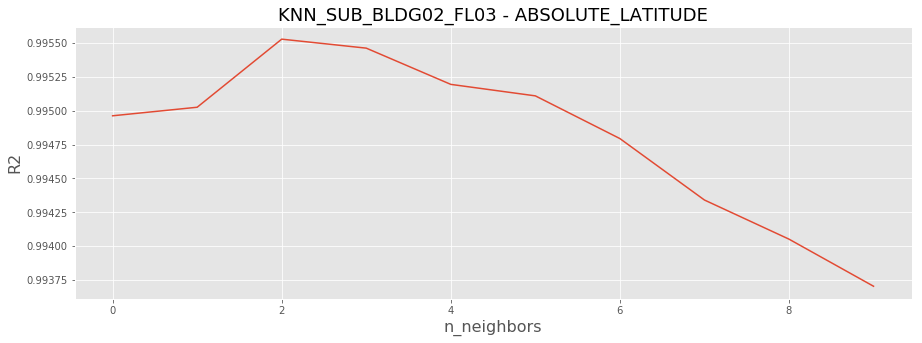

In [89]:
# plotting the r2 values against k values
KNN_SUB_BLDG02_FL03_LAT_curveR2 = pd.DataFrame(KNN_SUB_BLDG02_FL03_LAT_r2_val)
KNN_SUB_BLDG02_FL03_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_BLDG02_FL03 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_LAT_r2.png', bbox_inches='tight')

plt.show()

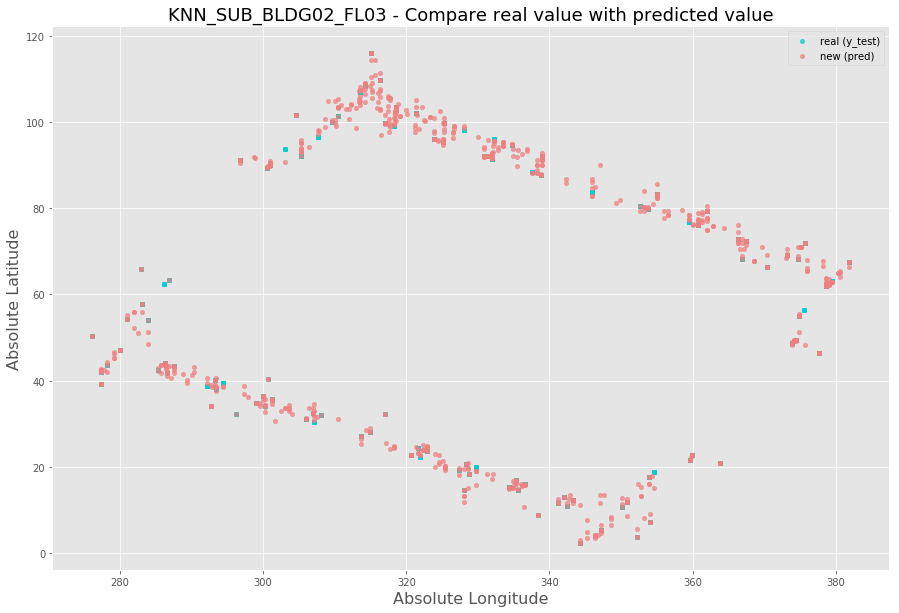

In [90]:
REAL_SUB_BLDG02_FL03 = pd.DataFrame()
REAL_SUB_BLDG02_FL03['ABSOLUTE_LONGITUDE'] = y_KNN_SUB_BLDG02_FL03_LON
REAL_SUB_BLDG02_FL03['ABSOLUTE_LATITUDE'] = y_KNN_SUB_BLDG02_FL03_LAT
ax1 = REAL_SUB_BLDG02_FL03.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'real (y_test)',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)

NEW_SUB_BLDG02_FL03 = pd.DataFrame()
NEW_SUB_BLDG02_FL03['ABSOLUTE_LONGITUDE'] = KNN_SUB_BLDG02_FL03_LON_pred
NEW_SUB_BLDG02_FL03['ABSOLUTE_LATITUDE'] = KNN_SUB_BLDG02_FL03_LAT_pred
ax2 = NEW_SUB_BLDG02_FL03.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                   label = 'new (pred)',
                   color="lightcoral",
                   figsize=(15,10),
                   alpha=0.75,
                   ax=ax1)

plt.title("KNN_SUB_BLDG02_FL03 - Compare real value with predicted value", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/04_KNN_SUB_BLDG02_FL03_REAL_NEW.png', bbox_inches='tight')

plt.show()

### KNN_SUB - FL00 <a id='KNN_SUB_FL00'></a>

#### KNN_SUB - FL00 - SPLITTING

In [91]:
# prepare X and y dataset
# (FLOOR (FL)= 384, BUILDINGID (BLDG) = 385, ABSOLUTE_LONGITUDE (LON) = 386, ABSOLUTE_LATITUDE (LAT) = 387)
X_KNN_SUB_FL00_FL = FL00_df_train.iloc[:, :-4].values
y_KNN_SUB_FL00_FL = FL00_df_train.iloc[:, 384].values

X_KNN_SUB_FL00_BLDG = FL00_df_train.iloc[:, :-4].values
y_KNN_SUB_FL00_BLDG = FL00_df_train.iloc[:, 385].values

X_KNN_SUB_FL00_LON = FL00_df_train.iloc[:, :-4].values
y_KNN_SUB_FL00_LON = FL00_df_train.iloc[:, 386].values

X_KNN_SUB_FL00_LAT = FL00_df_train.iloc[:, :-4].values
y_KNN_SUB_FL00_LAT = FL00_df_train.iloc[:, 387].values

#spliting the dataset into training and test set
X_KNN_SUB_FL00_FL_train, X_KNN_SUB_FL00_FL_test, y_KNN_SUB_FL00_FL_train, y_KNN_SUB_FL00_FL_test = train_test_split(X_KNN_SUB_FL00_FL, y_KNN_SUB_FL00_FL, test_size=0.3, random_state=0)
X_KNN_SUB_FL00_BLDG_train, X_KNN_SUB_FL00_BLDG_test, y_KNN_SUB_FL00_BLDG_train, y_KNN_SUB_FL00_BLDG_test = train_test_split(X_KNN_SUB_FL00_BLDG, y_KNN_SUB_FL00_BLDG, test_size=0.3, random_state=0)
X_KNN_SUB_FL00_LON_train, X_KNN_SUB_FL00_LON_test, y_KNN_SUB_FL00_LON_train, y_KNN_SUB_FL00_LON_test = train_test_split(X_KNN_SUB_FL00_LON, y_KNN_SUB_FL00_LON, test_size=0.3, random_state=0)
X_KNN_SUB_FL00_LAT_train, X_KNN_SUB_FL00_LAT_test, y_KNN_SUB_FL00_LAT_train, y_KNN_SUB_FL00_LAT_test = train_test_split(X_KNN_SUB_FL00_LAT, y_KNN_SUB_FL00_LAT, test_size=0.3, random_state=0)

#### KNN_SUB - FL00 - FLOOR

In [92]:
KNN_SUB_FL00_FL_start = timeit.default_timer() # start computing time

KNN_SUB_FL00_FL_r2_val = [] # to store r2 values for different k
KNN_SUB_FL00_FL_ac_val = [] # to store accuracy values for different k
KNN_SUB_FL00_FL_ka_val = [] # to store kappa values for different k

for KNN_SUB_FL00_FL in range(10):
    KNN_SUB_FL00_FL = KNN_SUB_FL00_FL + 1
    KNN_SUB_FL00_FL_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_FL00_FL)
    
    KNN_SUB_FL00_FL_model.fit(X_KNN_SUB_FL00_FL_train, y_KNN_SUB_FL00_FL_train)  # fit the model
    KNN_SUB_FL00_FL_pred = KNN_SUB_FL00_FL_model.predict(X_KNN_SUB_FL00_FL_test) # make prediction
    
    KNN_SUB_FL00_FL_r2 = r2_score(y_KNN_SUB_FL00_FL_test, KNN_SUB_FL00_FL_pred)
    KNN_SUB_FL00_FL_ac = accuracy_score(KNN_SUB_FL00_FL_pred, y_KNN_SUB_FL00_FL_test)
    KNN_SUB_FL00_FL_ka = cohen_kappa_score(y_KNN_SUB_FL00_FL_test, KNN_SUB_FL00_FL_pred)
    
    KNN_SUB_FL00_FL_r2_val.append(KNN_SUB_FL00_FL_r2) # store r2 values
    KNN_SUB_FL00_FL_ac_val.append(KNN_SUB_FL00_FL_ac) # store accuracy values
    KNN_SUB_FL00_FL_ka_val.append(KNN_SUB_FL00_FL_ka) # store kappa values
 
    print('Value (KNN_SUB_FL00_FL) for k=', KNN_SUB_FL00_FL, 'is:')    
    print('Rsqaure:', KNN_SUB_FL00_FL_r2)
    print('Accuracy', KNN_SUB_FL00_FL_ac)
    print('Kappa', KNN_SUB_FL00_FL_ka)

print ()
KNN_SUB_FL00_FL_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_FL00_FL = neighbors.KNeighborsClassifier()
KNN_SUB_FL00_FL_model = GridSearchCV(KNN_SUB_FL00_FL, KNN_SUB_FL00_FL_params, cv=5)
KNN_SUB_FL00_FL_model.fit(X_KNN_SUB_FL00_FL_train, y_KNN_SUB_FL00_FL_train)
print ('BEST   :', KNN_SUB_FL00_FL_model.best_params_)

print ()
KNN_SUB_FL00_FL_stop = timeit.default_timer() # stop computing time
KNN_SUB_FL00_FL_t = (KNN_SUB_FL00_FL_stop - KNN_SUB_FL00_FL_start)/60
print ('Time in min: ', round(KNN_SUB_FL00_FL_t, 3))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 7 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 8 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 9 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:576: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Value (KNN_SUB_FL00_FL) for k= 10 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa nan

BEST   : {'n_neighbors': 2}

Time in min:  0.516


In [93]:
KNN_SUB_FL00_FL_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_FL00_FL_model.fit(X_KNN_SUB_FL00_FL_train, y_KNN_SUB_FL00_FL_train)  # fit the model
KNN_SUB_FL00_FL_pred = KNN_SUB_FL00_FL_model.predict(X_KNN_SUB_FL00_FL_test) # make prediction

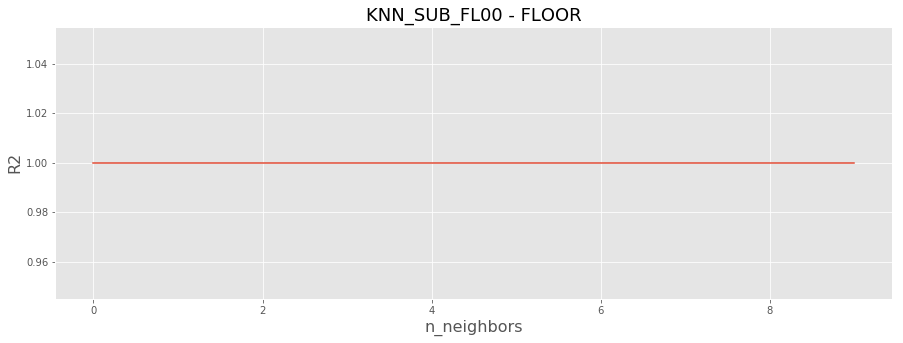

In [94]:
# plotting the r2 values against k values
KNN_SUB_FL00_FL_curveR2 = pd.DataFrame(KNN_SUB_FL00_FL_r2_val)
KNN_SUB_FL00_FL_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - FLOOR', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_FL_R2.png', bbox_inches='tight')

plt.show()

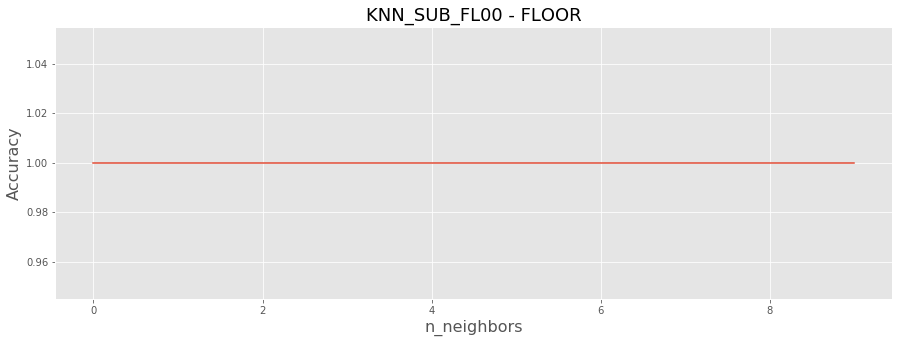

In [95]:
# plotting the accuracy values against k values
KNN_SUB_FL00_FL_curveAC = pd.DataFrame(KNN_SUB_FL00_FL_ac_val)
KNN_SUB_FL00_FL_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - FLOOR', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_FL_ACCURACY.png', bbox_inches='tight')

plt.show()

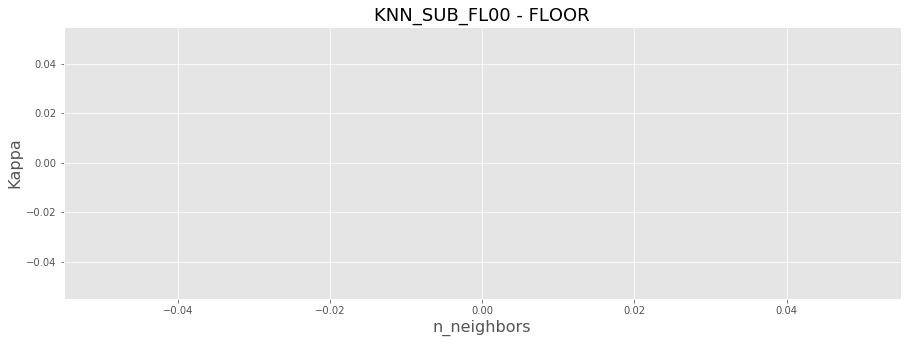

In [96]:
# plotting the kappa values against k values
KNN_SUB_FL00_FL_curveKA = pd.DataFrame(KNN_SUB_FL00_FL_ka_val)
KNN_SUB_FL00_FL_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - FLOOR', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_FL_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - FL00 - BUILDINGID

In [97]:
KNN_SUB_FL00_BLDG_start = timeit.default_timer() # start computing time

KNN_SUB_FL00_BLDG_r2_val = [] # to store r2 values for different k
KNN_SUB_FL00_BLDG_ac_val = [] # to store accuracy values for different k
KNN_SUB_FL00_BLDG_ka_val = [] # to store kappa values for different k

for KNN_SUB_FL00_BLDG in range(10):
    KNN_SUB_FL00_BLDG = KNN_SUB_FL00_BLDG + 1
    KNN_SUB_FL00_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = KNN_SUB_FL00_BLDG)
    
    KNN_SUB_FL00_BLDG_model.fit(X_KNN_SUB_FL00_BLDG_train, y_KNN_SUB_FL00_BLDG_train)  # fit the model
    KNN_SUB_FL00_BLDG_pred = KNN_SUB_FL00_BLDG_model.predict(X_KNN_SUB_FL00_BLDG_test) # make prediction
    
    KNN_SUB_FL00_BLDG_r2 = r2_score(y_KNN_SUB_FL00_BLDG_test, KNN_SUB_FL00_BLDG_pred)
    KNN_SUB_FL00_BLDG_ac = accuracy_score(KNN_SUB_FL00_BLDG_pred, y_KNN_SUB_FL00_BLDG_test)
    KNN_SUB_FL00_BLDG_ka = cohen_kappa_score(y_KNN_SUB_FL00_BLDG_test, KNN_SUB_FL00_BLDG_pred)
    
    KNN_SUB_FL00_BLDG_r2_val.append(KNN_SUB_FL00_BLDG_r2) # store r2 values
    KNN_SUB_FL00_BLDG_ac_val.append(KNN_SUB_FL00_BLDG_ac) # store accuracy values
    KNN_SUB_FL00_BLDG_ka_val.append(KNN_SUB_FL00_BLDG_ka) # store kappa values
 
    print('Value (KNN_SUB_FL00_BLDG) for k=', KNN_SUB_FL00_BLDG, 'is:')    
    print('Rsqaure:', KNN_SUB_FL00_BLDG_r2)
    print('Accuracy', KNN_SUB_FL00_BLDG_ac)
    print('Kappa', KNN_SUB_FL00_BLDG_ka)

print ()
KNN_SUB_FL00_BLDG_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_FL00_BLDG = neighbors.KNeighborsClassifier()
KNN_SUB_FL00_BLDG_model = GridSearchCV(KNN_SUB_FL00_BLDG, KNN_SUB_FL00_BLDG_params, cv=5)
KNN_SUB_FL00_BLDG_model.fit(X_KNN_SUB_FL00_BLDG_train, y_KNN_SUB_FL00_BLDG_train)
print ('BEST   :', KNN_SUB_FL00_BLDG_model.best_params_)

print ()
KNN_SUB_FL00_BLDG_stop = timeit.default_timer() # stop computing time
KNN_SUB_FL00_BLDG_t = (KNN_SUB_FL00_BLDG_stop - KNN_SUB_FL00_BLDG_start)/60
print ('Time in min: ', round(KNN_SUB_FL00_BLDG_t, 3))

Value (KNN_SUB_FL00_BLDG) for k= 1 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa 1.0
Value (KNN_SUB_FL00_BLDG) for k= 2 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa 1.0
Value (KNN_SUB_FL00_BLDG) for k= 3 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa 1.0
Value (KNN_SUB_FL00_BLDG) for k= 4 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa 1.0
Value (KNN_SUB_FL00_BLDG) for k= 5 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa 1.0
Value (KNN_SUB_FL00_BLDG) for k= 6 is:
Rsqaure: 1.0
Accuracy 1.0
Kappa 1.0
Value (KNN_SUB_FL00_BLDG) for k= 7 is:
Rsqaure: 0.9987891421444666
Accuracy 0.9992307692307693
Kappa 0.9987999143323462
Value (KNN_SUB_FL00_BLDG) for k= 8 is:
Rsqaure: 0.9987891421444666
Accuracy 0.9992307692307693
Kappa 0.9987999143323462
Value (KNN_SUB_FL00_BLDG) for k= 9 is:
Rsqaure: 0.997578284288933
Accuracy 0.9984615384615385
Kappa 0.9975994253393582
Value (KNN_SUB_FL00_BLDG) for k= 10 is:
Rsqaure: 0.997578284288933
Accuracy 0.9984615384615385
Kappa 0.9975994253393582

BEST   : {'n_neighbors': 2}

Time in min:  0.511


In [98]:
KNN_SUB_FL00_BLDG_model = neighbors.KNeighborsClassifier(n_neighbors = 2)

KNN_SUB_FL00_BLDG_model.fit(X_KNN_SUB_FL00_BLDG_train, y_KNN_SUB_FL00_BLDG_train)  # fit the model
KNN_SUB_FL00_BLDG_pred = KNN_SUB_FL00_BLDG_model.predict(X_KNN_SUB_FL00_BLDG_test) # make prediction

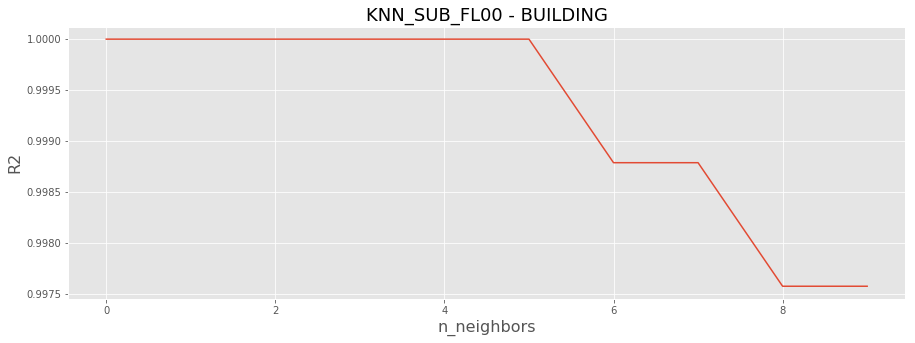

In [99]:
# plotting the r2 values against k values
KNN_SUB_FL00_BLDG_curveR2 = pd.DataFrame(KNN_SUB_FL00_BLDG_r2_val)
KNN_SUB_FL00_BLDG_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - BUILDING', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_BLDG_R2.png', bbox_inches='tight')

plt.show()

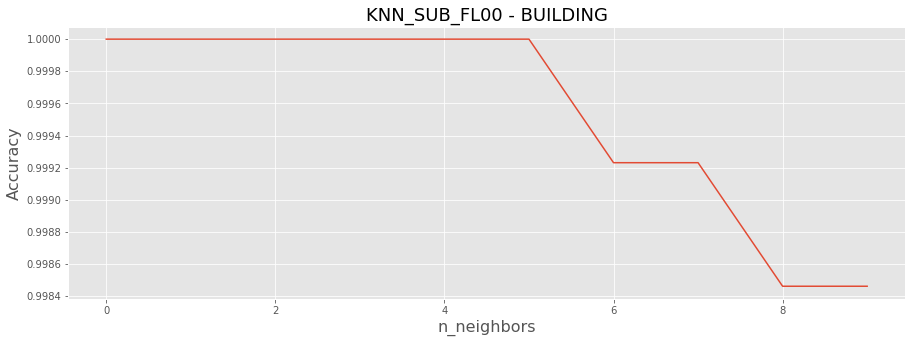

In [100]:
# plotting the accuracy values against k values
KNN_SUB_FL00_BLDG_curveAC = pd.DataFrame(KNN_SUB_FL00_BLDG_ac_val)
KNN_SUB_FL00_BLDG_curveAC.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - BUILDING', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_BLDG_ACCURACY.png', bbox_inches='tight')

plt.show()

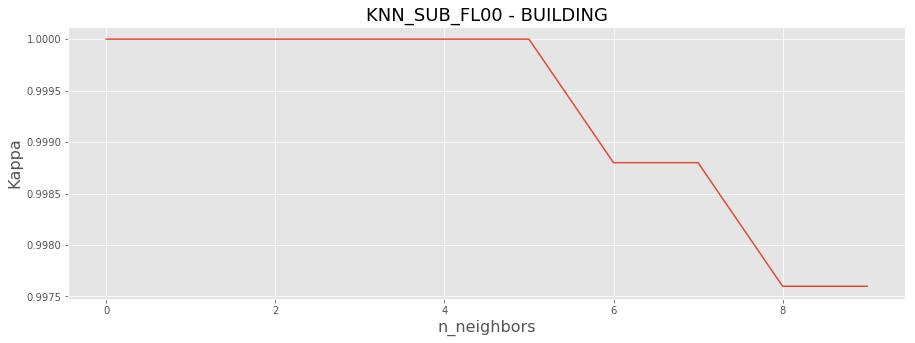

In [101]:
# plotting the kappa values against k values
KNN_SUB_FL00_BLDG_curveKA = pd.DataFrame(KNN_SUB_FL00_BLDG_ka_val)
KNN_SUB_FL00_BLDG_curveKA.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - BUILDING', fontsize=18)
plt.ylabel('Kappa', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_BLDG_KAPPA.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - FL00 - ABSOLUTE_LONGITUDE

In [102]:
KNN_SUB_FL00_LON_start = timeit.default_timer() # start computing time

KNN_SUB_FL00_LON_rmse_val = [] # to store rmse values for different k
KNN_SUB_FL00_LON_r2_val = [] # to store r2 values for different k

for KNN_SUB_FL00_LON in range(10):
    KNN_SUB_FL00_LON = KNN_SUB_FL00_LON + 1
    KNN_SUB_FL00_LON_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_FL00_LON)

    KNN_SUB_FL00_LON_model.fit(X_KNN_SUB_FL00_LON_train, y_KNN_SUB_FL00_LON_train)  # fit the model
    KNN_SUB_FL00_LON_pred = KNN_SUB_FL00_LON_model.predict(X_KNN_SUB_FL00_LON_test) # make prediction
    
    KNN_SUB_FL00_LON_rmse = sqrt(mean_squared_error(y_KNN_SUB_FL00_LON_test, KNN_SUB_FL00_LON_pred))
    KNN_SUB_FL00_LON_r2 = r2_score(y_KNN_SUB_FL00_LON_test, KNN_SUB_FL00_LON_pred)
    
    KNN_SUB_FL00_LON_rmse_val.append(KNN_SUB_FL00_LON_rmse) # store rmse values
    KNN_SUB_FL00_LON_r2_val.append(KNN_SUB_FL00_LON_r2) # store r2 values

    print('Value (LON) for k=',KNN_SUB_FL00_LON,'is:')    
    print('RMSE   :', KNN_SUB_FL00_LON_rmse)
    print('Rsqaure:', KNN_SUB_FL00_LON_r2)
    
print ()
KNN_SUB_FL00_LON_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_FL00_LON = neighbors.KNeighborsRegressor()
KNN_SUB_FL00_LON_model = GridSearchCV(KNN_SUB_FL00_LON, KNN_SUB_FL00_LON_params, cv=5)
KNN_SUB_FL00_LON_model.fit(X_KNN_SUB_FL00_LON_train, y_KNN_SUB_FL00_LON_train)
print ('BEST   :', KNN_SUB_FL00_LON_model.best_params_)

print ()
KNN_SUB_FL00_LON_stop = timeit.default_timer() # stop computing time
KNN_SUB_FL00_LON_t = (KNN_SUB_FL00_LON_stop - KNN_SUB_FL00_LON_start)/60
print ('Time in min: ', round(KNN_SUB_FL00_LON_t, 3))

Value (LON) for k= 1 is:
RMSE   : 5.5647934626292805
Rsqaure: 0.9977738875879486
Value (LON) for k= 2 is:
RMSE   : 5.4448920049274045
Rsqaure: 0.9978687836882814
Value (LON) for k= 3 is:
RMSE   : 4.050094850798461
Rsqaure: 0.9988208219689073
Value (LON) for k= 4 is:
RMSE   : 3.964581640084667
Rsqaure: 0.998870090339642
Value (LON) for k= 5 is:
RMSE   : 4.177615272134847
Rsqaure: 0.998745398289963
Value (LON) for k= 6 is:
RMSE   : 4.238633210308168
Rsqaure: 0.9987084814032721
Value (LON) for k= 7 is:
RMSE   : 4.439717781367955
Rsqaure: 0.9985830330540144
Value (LON) for k= 8 is:
RMSE   : 4.7883236084210115
Rsqaure: 0.9983517769702044
Value (LON) for k= 9 is:
RMSE   : 5.116875492528646
Rsqaure: 0.99811783068016
Value (LON) for k= 10 is:
RMSE   : 5.5297094703130325
Rsqaure: 0.9978018687564897

BEST   : {'n_neighbors': 3}

Time in min:  0.512


In [103]:
KNN_SUB_FL00_LON_model = neighbors.KNeighborsRegressor(n_neighbors = 4)

KNN_SUB_FL00_LON_model.fit(X_KNN_SUB_FL00_LON_train, y_KNN_SUB_FL00_LON_train)  # fit the model
KNN_SUB_FL00_LON_pred = KNN_SUB_FL00_LON_model.predict(X_KNN_SUB_FL00_LON_test) # make prediction

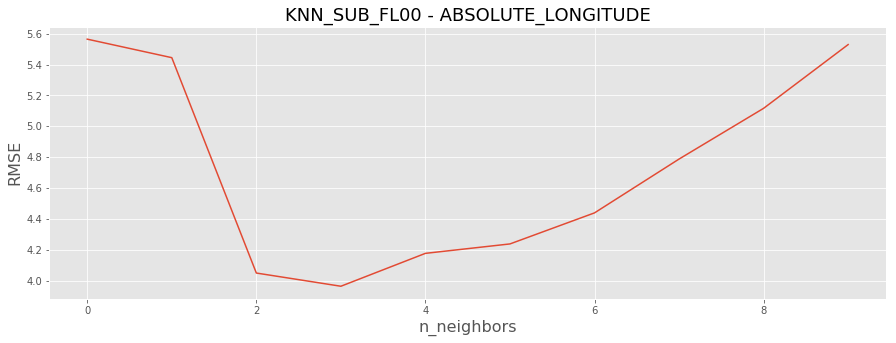

In [104]:
# plotting the rmse values against k values
KNN_SUB_FL00_LON_curveRMSE = pd.DataFrame(KNN_SUB_FL00_LON_rmse_val)
KNN_SUB_FL00_LON_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_LON_RMSE.png', bbox_inches='tight')

plt.show()

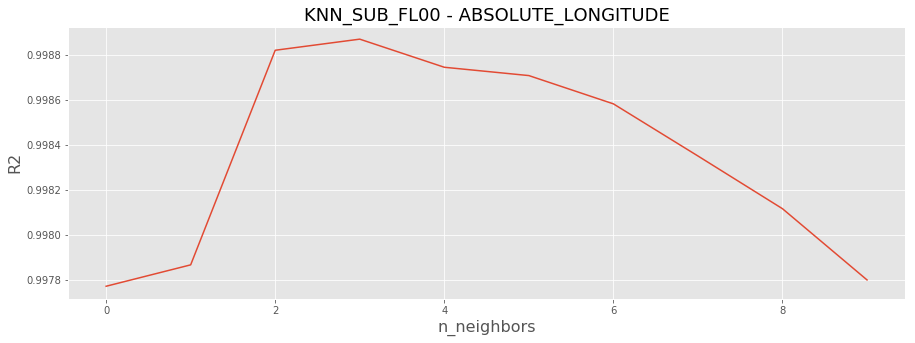

In [105]:
# plotting the r2 values against k values
KNN_SUB_FL00_LON_curveR2 = pd.DataFrame(KNN_SUB_FL00_LON_r2_val)
KNN_SUB_FL00_LON_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - ABSOLUTE_LONGITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_LON_r2.png', bbox_inches='tight')

plt.show()

#### KNN_SUB - FL00 - ABSOLUTE_LATITUDE

In [106]:
KNN_SUB_FL00_LAT_start = timeit.default_timer() # start computing time

KNN_SUB_FL00_LAT_rmse_val = [] # to store rmse values for different k
KNN_SUB_FL00_LAT_r2_val = [] # to store r2 values for different k

for KNN_SUB_FL00_LAT in range(10):
    KNN_SUB_FL00_LAT = KNN_SUB_FL00_LAT + 1
    KNN_SUB_FL00_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = KNN_SUB_FL00_LAT)

    KNN_SUB_FL00_LAT_model.fit(X_KNN_SUB_FL00_LAT_train, y_KNN_SUB_FL00_LAT_train)  # fit the model
    KNN_SUB_FL00_LAT_pred = KNN_SUB_FL00_LAT_model.predict(X_KNN_SUB_FL00_LAT_test) # make prediction
    
    KNN_SUB_FL00_LAT_rmse = sqrt(mean_squared_error(y_KNN_SUB_FL00_LAT_test, KNN_SUB_FL00_LAT_pred))
    KNN_SUB_FL00_LAT_r2 = r2_score(y_KNN_SUB_FL00_LAT_test, KNN_SUB_FL00_LAT_pred)
    
    KNN_SUB_FL00_LAT_rmse_val.append(KNN_SUB_FL00_LAT_rmse) # store rmse values
    KNN_SUB_FL00_LAT_r2_val.append(KNN_SUB_FL00_LAT_r2) # store r2 values

    print('Value (LAT) for k=',KNN_SUB_FL00_LAT,'is:')    
    print('RMSE   :', KNN_SUB_FL00_LAT_rmse)
    print('Rsqaure:', KNN_SUB_FL00_LAT_r2)
    
print ()
KNN_SUB_FL00_LAT_params = {'n_neighbors': np.arange(2, 9)} # set range for GridSearchCV
KNN_SUB_FL00_LAT = neighbors.KNeighborsRegressor()
KNN_SUB_FL00_LAT_model = GridSearchCV(KNN_SUB_FL00_LAT, KNN_SUB_FL00_LAT_params, cv=5)
KNN_SUB_FL00_LAT_model.fit(X_KNN_SUB_FL00_LAT_train, y_KNN_SUB_FL00_LAT_train)
print ('BEST   :', KNN_SUB_FL00_LAT_model.best_params_)

print ()
KNN_SUB_FL00_LAT_stop = timeit.default_timer() # stop computing time
KNN_SUB_FL00_LAT_t = (KNN_SUB_FL00_LAT_stop - KNN_SUB_FL00_LAT_start)/60
print ('Time in min: ', round(KNN_SUB_FL00_LAT_t, 3))

Value (LAT) for k= 1 is:
RMSE   : 3.751072770908479
Rsqaure: 0.9962925122358165
Value (LAT) for k= 2 is:
RMSE   : 3.613888997439271
Rsqaure: 0.9965587330386101
Value (LAT) for k= 3 is:
RMSE   : 3.603740806780166
Rsqaure: 0.9965780328012728
Value (LAT) for k= 4 is:
RMSE   : 3.655431244133706
Rsqaure: 0.9964791624575785
Value (LAT) for k= 5 is:
RMSE   : 3.8290893262104664
Rsqaure: 0.9961366883569244
Value (LAT) for k= 6 is:
RMSE   : 4.0330073722392035
Rsqaure: 0.9957142505402572
Value (LAT) for k= 7 is:
RMSE   : 4.3191851344199215
Rsqaure: 0.9950844469583775
Value (LAT) for k= 8 is:
RMSE   : 4.631972213984445
Rsqaure: 0.9943467181484945
Value (LAT) for k= 9 is:
RMSE   : 4.875918103869087
Rsqaure: 0.9937355701191597
Value (LAT) for k= 10 is:
RMSE   : 5.140532634685728
Rsqaure: 0.9930371828794275

BEST   : {'n_neighbors': 2}

Time in min:  0.51


In [107]:
KNN_SUB_FL00_LAT_model = neighbors.KNeighborsRegressor(n_neighbors = 4)

KNN_SUB_FL00_LAT_model.fit(X_KNN_SUB_FL00_LAT_train, y_KNN_SUB_FL00_LAT_train)  # fit the model
KNN_SUB_FL00_LAT_pred = KNN_SUB_FL00_LAT_model.predict(X_KNN_SUB_FL00_LAT_test) # make prediction

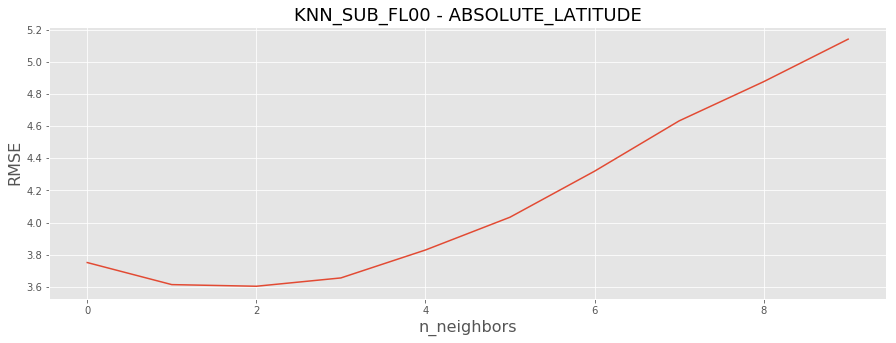

In [108]:
# plotting the rmse values against k values
KNN_SUB_FL00_LAT_curveRMSE = pd.DataFrame(KNN_SUB_FL00_LAT_rmse_val)
KNN_SUB_FL00_LAT_curveRMSE.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('RMSE', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_LAT_RMSE.png', bbox_inches='tight')

plt.show()

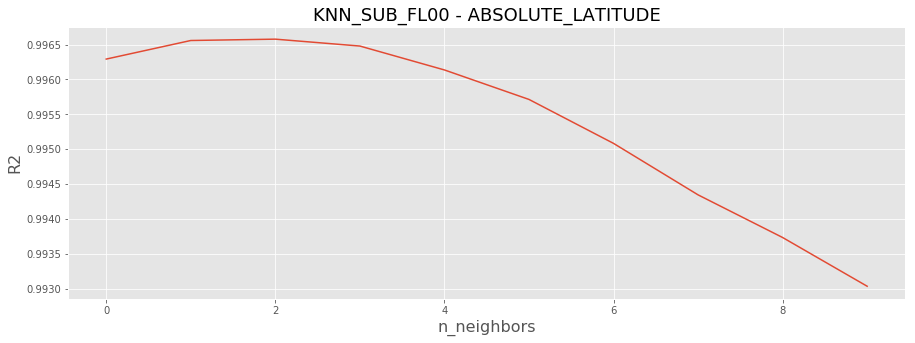

In [109]:
# plotting the r2 values against k values
KNN_SUB_FL00_LAT_curveR2 = pd.DataFrame(KNN_SUB_FL00_LAT_r2_val)
KNN_SUB_FL00_LAT_curveR2.plot(legend=None, figsize=(15,5))

plt.title('KNN_SUB_FL00 - ABSOLUTE_LATITUDE', fontsize=18)
plt.ylabel('R2', fontsize=16)
plt.xlabel('n_neighbors', fontsize=16)

plt.savefig('./knn/05_KNN_SUB_FL00_LAT_r2.png', bbox_inches='tight')

plt.show()

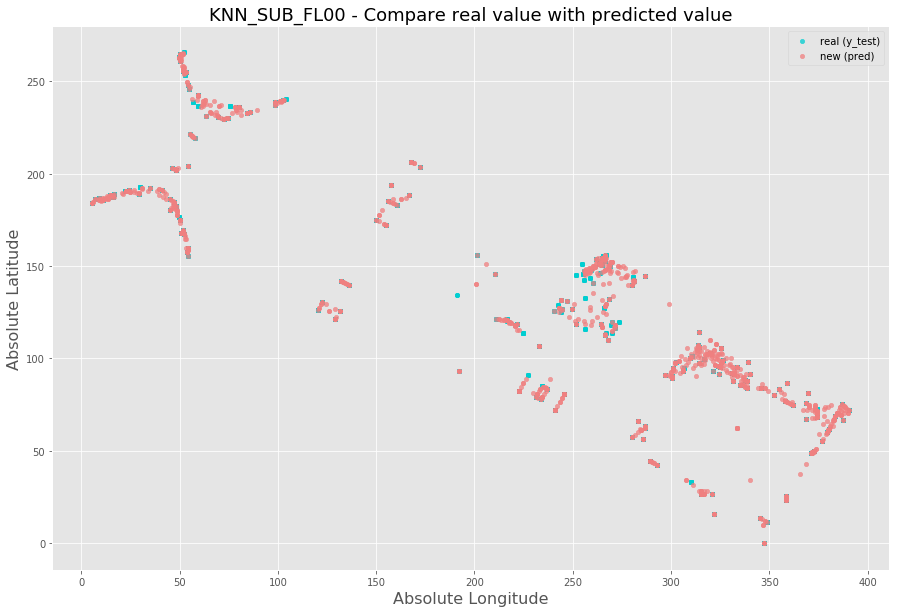

In [110]:
REAL_SUB_FL00 = pd.DataFrame()
REAL_SUB_FL00['ABSOLUTE_LONGITUDE'] = y_KNN_SUB_FL00_LON
REAL_SUB_FL00['ABSOLUTE_LATITUDE'] = y_KNN_SUB_FL00_LAT
ax1 = REAL_SUB_FL00.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'real (y_test)',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)

NEW_SUB_FL00 = pd.DataFrame()
NEW_SUB_FL00['ABSOLUTE_LONGITUDE'] = KNN_SUB_FL00_LON_pred
NEW_SUB_FL00['ABSOLUTE_LATITUDE'] = KNN_SUB_FL00_LAT_pred
ax2 = NEW_SUB_FL00.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                   label = 'new (pred)',
                   color="lightcoral",
                   figsize=(15,10),
                   alpha=0.75,
                   ax=ax1)

plt.title("KNN_SUB_FL00 - Compare real value with predicted value", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/05_KNN_SUB_FL00_REAL_NEW.png', bbox_inches='tight')

plt.show()

### 004 - Data predicting <a id='data_predicting'></a>

#### SPLITTING

In [111]:
# prepare X and y validationData
# (FLOOR (FL)= 297, BUILDINGID (BLDG) = 298, ABSOLUTE_LONGITUDE (LON) = 299, ABSOLUTE_LATITUDE (LAT) = 200)
X_KNN_ALL_FL_test = df_valid.iloc[:, :-4].values
y_KNN_ALL_FL_test = df_valid.iloc[:, 384].values

X_KNN_ALL_BLDG_test = df_valid.iloc[:, :-4].values
y_KNN_ALL_BLDG_test = df_valid.iloc[:, 385].values

X_KNN_ALL_LON_test = df_valid.iloc[:, :-4]
y_KNN_ALL_LON_test = df_valid.iloc[:, 386].values

X_KNN_ALL_LAT_test = df_valid.iloc[:, :-4].values
y_KNN_ALL_LAT_test = df_valid.iloc[:, 387].values

In [112]:
FL_model = KNN_ALL_FL_model
BLDG_model = KNN_ALL_BLDG_model
LON_model = KNN_ALL_LON_model
LAT_model = KNN_ALL_LAT_model

In [113]:
FL_pred = FL_model.predict(X_KNN_ALL_FL_test)
BLDG_pred = BLDG_model.predict(X_KNN_ALL_BLDG_test)
LON_pred = LON_model.predict(X_KNN_ALL_LON_test)
LAT_pred = LAT_model.predict(X_KNN_ALL_LAT_test)

In [114]:
print ('R2')
print ('FL  :', r2_score(y_KNN_ALL_FL_test, FL_pred))
print ('BLDG:', r2_score(y_KNN_ALL_BLDG_test, BLDG_pred))
print ('LON :', r2_score(y_KNN_ALL_LON_test, LON_pred))
print ('LAT :', r2_score(y_KNN_ALL_LAT_test, LAT_pred))

R2
FL  : 0.844621013826079
BLDG: 0.9959253807019564
LON : 0.9857876645953868
LAT : 0.9710850885532955


In [115]:
print ('RMSE')
print ('FL  :', sqrt(mean_squared_error(y_KNN_ALL_FL_test, FL_pred)))
print ('BLDG:', sqrt(mean_squared_error(y_KNN_ALL_BLDG_test, BLDG_pred)))
print ('LON :', sqrt(mean_squared_error(y_KNN_ALL_LON_test, LON_pred)))
print ('LAT :', sqrt(mean_squared_error(y_KNN_ALL_LAT_test, LAT_pred)))

RMSE
FL  : 0.39496378713368047
BLDG: 0.052010958129557215
LON : 14.290888957904421
LAT : 11.938429325372972


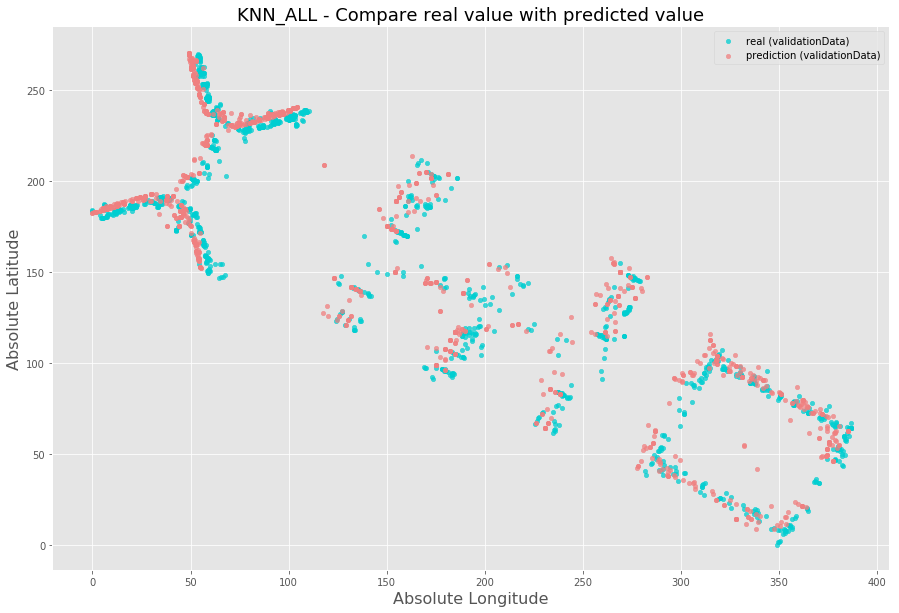

In [116]:
REAL = pd.DataFrame()
REAL['FLOOR'] = y_KNN_ALL_FL_test
REAL['ABSOLUTE_LONGITUDE'] = y_KNN_ALL_LON_test
REAL['ABSOLUTE_LATITUDE'] = y_KNN_ALL_LAT_test
ax1 = REAL.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'real (validationData)',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)

NEW = pd.DataFrame()
NEW['FLOOR'] = FL_pred
NEW['ABSOLUTE_LONGITUDE'] = LON_pred
NEW['ABSOLUTE_LATITUDE'] = LAT_pred
ax2 = NEW.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                   label = 'prediction (validationData)',
                   color="lightcoral",
                   figsize=(15,10),
                   alpha=0.75,
                   ax=ax1)

plt.title("KNN_ALL - Compare real value with predicted value", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/06_KNN_REAL_NEW.png', bbox_inches='tight')

plt.show()

In [117]:
df_valid['LAT_pred'] = 0 
df_valid['LON_pred'] = 0
df_valid['LAT_real'] = 0 
df_valid['LON_real'] = 0
df_valid['LAT_error'] = 0 
df_valid['LON_error'] = 0
df_valid['DIST_error'] = 0
df_valid.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,BUILDINGID,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE,LAT_pred,LON_pred,LAT_real,LON_real,LAT_error,LON_error,DIST_error
0,0,0,0,0,0,0,0,0,0,0,...,1,180.021956,141.647431,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,18,18,...,2,312.071534,91.724822,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,32,33,...,2,321.636675,98.518237,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,28,30,...,2,330.113872,94.813768,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,54.439452,174.383692,0,0,0,0,0,0,0


In [118]:
df_valid.iloc[:,388] = LAT_pred
df_valid.iloc[:,389] = LON_pred
df_valid.iloc[:,390] = y_KNN_ALL_LAT_test
df_valid.iloc[:,391] = y_KNN_ALL_LON_test
df_valid.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,BUILDINGID,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE,LAT_pred,LON_pred,LAT_real,LON_real,LAT_error,LON_error,DIST_error
0,0,0,0,0,0,0,0,0,0,0,...,1,180.021956,141.647431,114.926222,262.371941,141.647431,180.021956,0,0,0
1,0,0,0,0,0,0,0,0,18,18,...,2,312.071534,91.724822,93.213984,305.812000,91.724822,312.071534,0,0,0
2,0,0,0,0,0,0,0,0,32,33,...,2,321.636675,98.518237,102.008484,321.327700,98.518237,321.636675,0,0,0
3,0,0,0,0,0,0,0,0,28,30,...,2,330.113872,94.813768,98.275684,328.056100,94.813768,330.113872,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,54.439452,174.383692,175.051360,44.001849,174.383692,54.439452,0,0,0


In [119]:
df_valid.iloc[:,392] = abs(df_valid['LAT_pred'] - df_valid['LAT_real'])
df_valid.iloc[:,393] = abs(df_valid['LON_pred'] - df_valid['LON_real'])
df_valid.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,BUILDINGID,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE,LAT_pred,LON_pred,LAT_real,LON_real,LAT_error,LON_error,DIST_error
0,0,0,0,0,0,0,0,0,0,0,...,1,180.021956,141.647431,114.926222,262.371941,141.647431,180.021956,26.721210,82.349986,0
1,0,0,0,0,0,0,0,0,18,18,...,2,312.071534,91.724822,93.213984,305.812000,91.724822,312.071534,1.489162,6.259534,0
2,0,0,0,0,0,0,0,0,32,33,...,2,321.636675,98.518237,102.008484,321.327700,98.518237,321.636675,3.490247,0.308975,0
3,0,0,0,0,0,0,0,0,28,30,...,2,330.113872,94.813768,98.275684,328.056100,94.813768,330.113872,3.461916,2.057772,0
4,0,0,0,0,0,0,0,0,0,0,...,0,54.439452,174.383692,175.051360,44.001849,174.383692,54.439452,0.667667,10.437602,0


In [120]:
df_valid['DIST_error'] = np.sqrt((df_valid['LAT_error']*2)+(df_valid['LON_error']*2))
df_valid.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,BUILDINGID,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE,LAT_pred,LON_pred,LAT_real,LON_real,LAT_error,LON_error,DIST_error
0,0,0,0,0,0,0,0,0,0,0,...,1,180.021956,141.647431,114.926222,262.371941,141.647431,180.021956,26.721210,82.349986,14.769644
1,0,0,0,0,0,0,0,0,18,18,...,2,312.071534,91.724822,93.213984,305.812000,91.724822,312.071534,1.489162,6.259534,3.936673
2,0,0,0,0,0,0,0,0,32,33,...,2,321.636675,98.518237,102.008484,321.327700,98.518237,321.636675,3.490247,0.308975,2.756528
3,0,0,0,0,0,0,0,0,28,30,...,2,330.113872,94.813768,98.275684,328.056100,94.813768,330.113872,3.461916,2.057772,3.322556
4,0,0,0,0,0,0,0,0,0,0,...,0,54.439452,174.383692,175.051360,44.001849,174.383692,54.439452,0.667667,10.437602,4.712806


In [121]:
df_valid['DIST_error'] = df_valid['DIST_error'].astype(int)

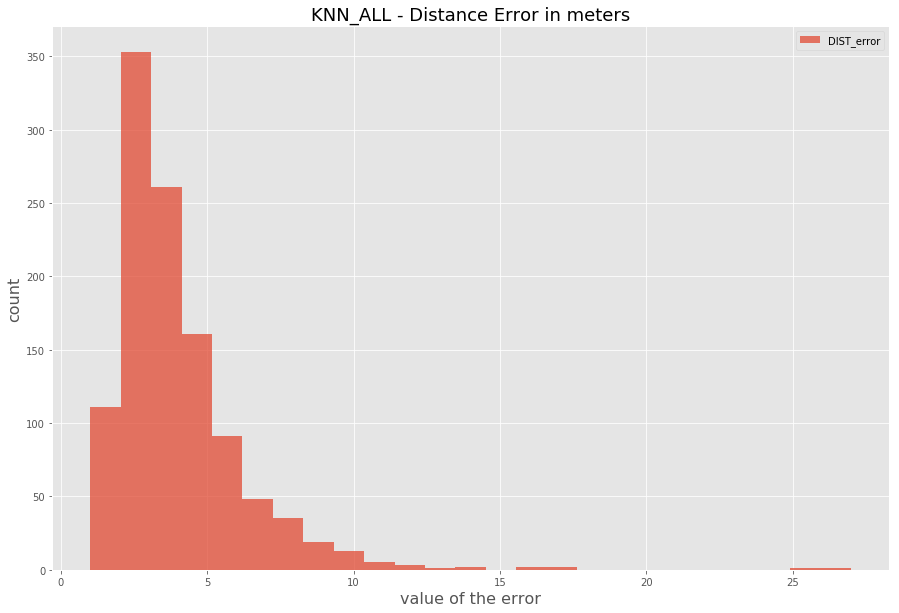

In [122]:
DIST = df_valid['DIST_error']

plt.figure();

DIST.plot.hist(figsize=(15,10),
               alpha=0.75,
               bins=25)

plt.title("KNN_ALL - Distance Error in meters", fontsize=18)
plt.xlabel('value of the error', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.legend(loc='best')

plt.savefig('./knn/06_KNN_DistanceError.png', bbox_inches='tight')

plt.show()